# Google Play Store Applications

#### Group members:
- Omar M. Hussein.
- Julian Ruggiero.
- Eli Weiss.

# Abstract


Using an empirical methodology, this study finds strategic business decisions that application creators can act on to improve their chances of having an application that gains more than 1 Million downloads and provides them with a starting point that places them on the right path towards building a successful application. This study follows a full data science life cycle to provide insights and with the help of machine learning models such as Support vector machines, KNNs, and Random forests. This study finds that the most significant predictors of an application are the reviews of an application (which means that the amount of reviews an app has) is a high predictor of success which paves the way for further research around the reviews of android applications. Additionally, we also found that the highest controllable predictor is the size of the download followed by price. Developers and business executives alike should adopt strategies to ensure quick download times for users. This study finds that rating is also a good predictor of success. Developers and business executives should adopt strategies to pursue positive feedback from users and to drive prices as low as possible while maintaining an application of reasonable size relative to the type of application.

# Introduction

Google Play, formerly Android Market, is a digital distribution service operated and developed by Google. The Google play store is a place where people enjoy millions of the latest Android applications, games, music, movies, TV, and books all over the world. Anything an individual would need can be found from time trackers for office to games for kids. You simply need to log in to your Google account to start purchasing applications on your mobile device. In this project we are going to closely examine the google play store, focusing on what makes applications successful. The 2010s were a decade of massive transformation for the tech industry. Advances in technology brought nearly every industry online, and the proliferation of mobile devices and social media fundamentally changed the way consumers and businesses interact. In this project we consider the number of installs as our key performance indicator and we set a threshold as to define which number of installs represents a successful application and which represent otherwise.
#### Background
Every year millions of apps are created and put on the app store. Entrepreneurs and coders all of the world try to make it big with their ideas, but few ever succeed. Only 0.73% of apps in the Google play store reach 1 Million or more downloads. [1](https://www.statista.com/statistics/269884/android-app-downloads/) 
#### Research Question
We will seek to understand and predict the attributes that influence an apps ability to reach over 1 Million downloads.
#### Application of findings
This study will seek to find strategic business decisions that application creators can act on to improve their chances of having an app that gains more than 1 Million downloads.
#### Methodology
We will first examine our sample data set and make sure all the observations in our data are valid. After, we will alter the data to reflect any necessary changes that are needed to make sure the data we are using will generalize well. Once our data is cleaned and prepped for modeling, we will construct 3 Base Models: A KNN, random forest, and an SVM. Then we will use these three models to create an ensemble model by combining the predictions of all three models.

__Workflow__

1) Data Profiling

2) Exploratory Data Analysis

3) Data Preparation

4) Preped Data Review

5) Modeling

6) Post-Modeling Exploratory Data Analysis

7) Select Models

8) Conclusions

# Data Profiling

The data set contains 10841 observations and 13 attributes of nominal data. More information about the data can be found at: [Link](https://www.kaggle.com/lava18/google-play-store-apps) <br> 


The attributes:

- __App:__ This is the application name    
- __Category:__ Category the app belongs to 
- __Rating:__ Overall user rating of the app         
- __Reviews:__ Number of user reviews for the app                
- __Size:__ Size of the app                
- __Installs:__ Number of user downloads/installs for the app                    
- __Type:__ Paid or Free         
- __Price:__ Price of the application           
- __Content Rating:__  Age group the app is targeted at - Children / Mature 21+ / Adult             
- __Genres:__ An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- __Last Updated:__ Date when the app was last updated on Play Store
- __Current Ver:__ Current version of the app available on Play Store (as when scraped)
- __Android Ver:__ Min required Android version

#### Helper functions

In [1]:
# helper functions
def is_cast_to_float(v):
    try:
        float(v)
        return True
    except ValueError:
        return False

# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
import missingno as msno 
import re
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

C:\Users\julir\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Here we load the data from an amazon S3 bucket.

In [3]:
#loading the data set 
df = pd.read_csv("https://finalprojectomarjulianeli.s3.amazonaws.com/googleplaystore.csv")
df.columns = df.columns.str.replace(' ', '_')

#sanity check
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
#checking data types on raw data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can see that the majority of data type is String, except for Price and Size which are float and last_updated as a datetime. Next we explore the missing values.

In [5]:
#getting exact number of null values in each column
null_count = df.isnull().sum()

# get percent of missing data
missing = df.isnull().mean() * 100

#creating a dictionary with the count of null and negative values
d = {'# Missing':null_count,'% of Total':missing}
pd.DataFrame(d)

,# Missing,% of Total
App,0,0.000000
Category,0,0.000000
Rating,1474,13.596532
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.009224
Price,0,0.000000
Content_Rating,1,0.009224
Genres,0,0.000000


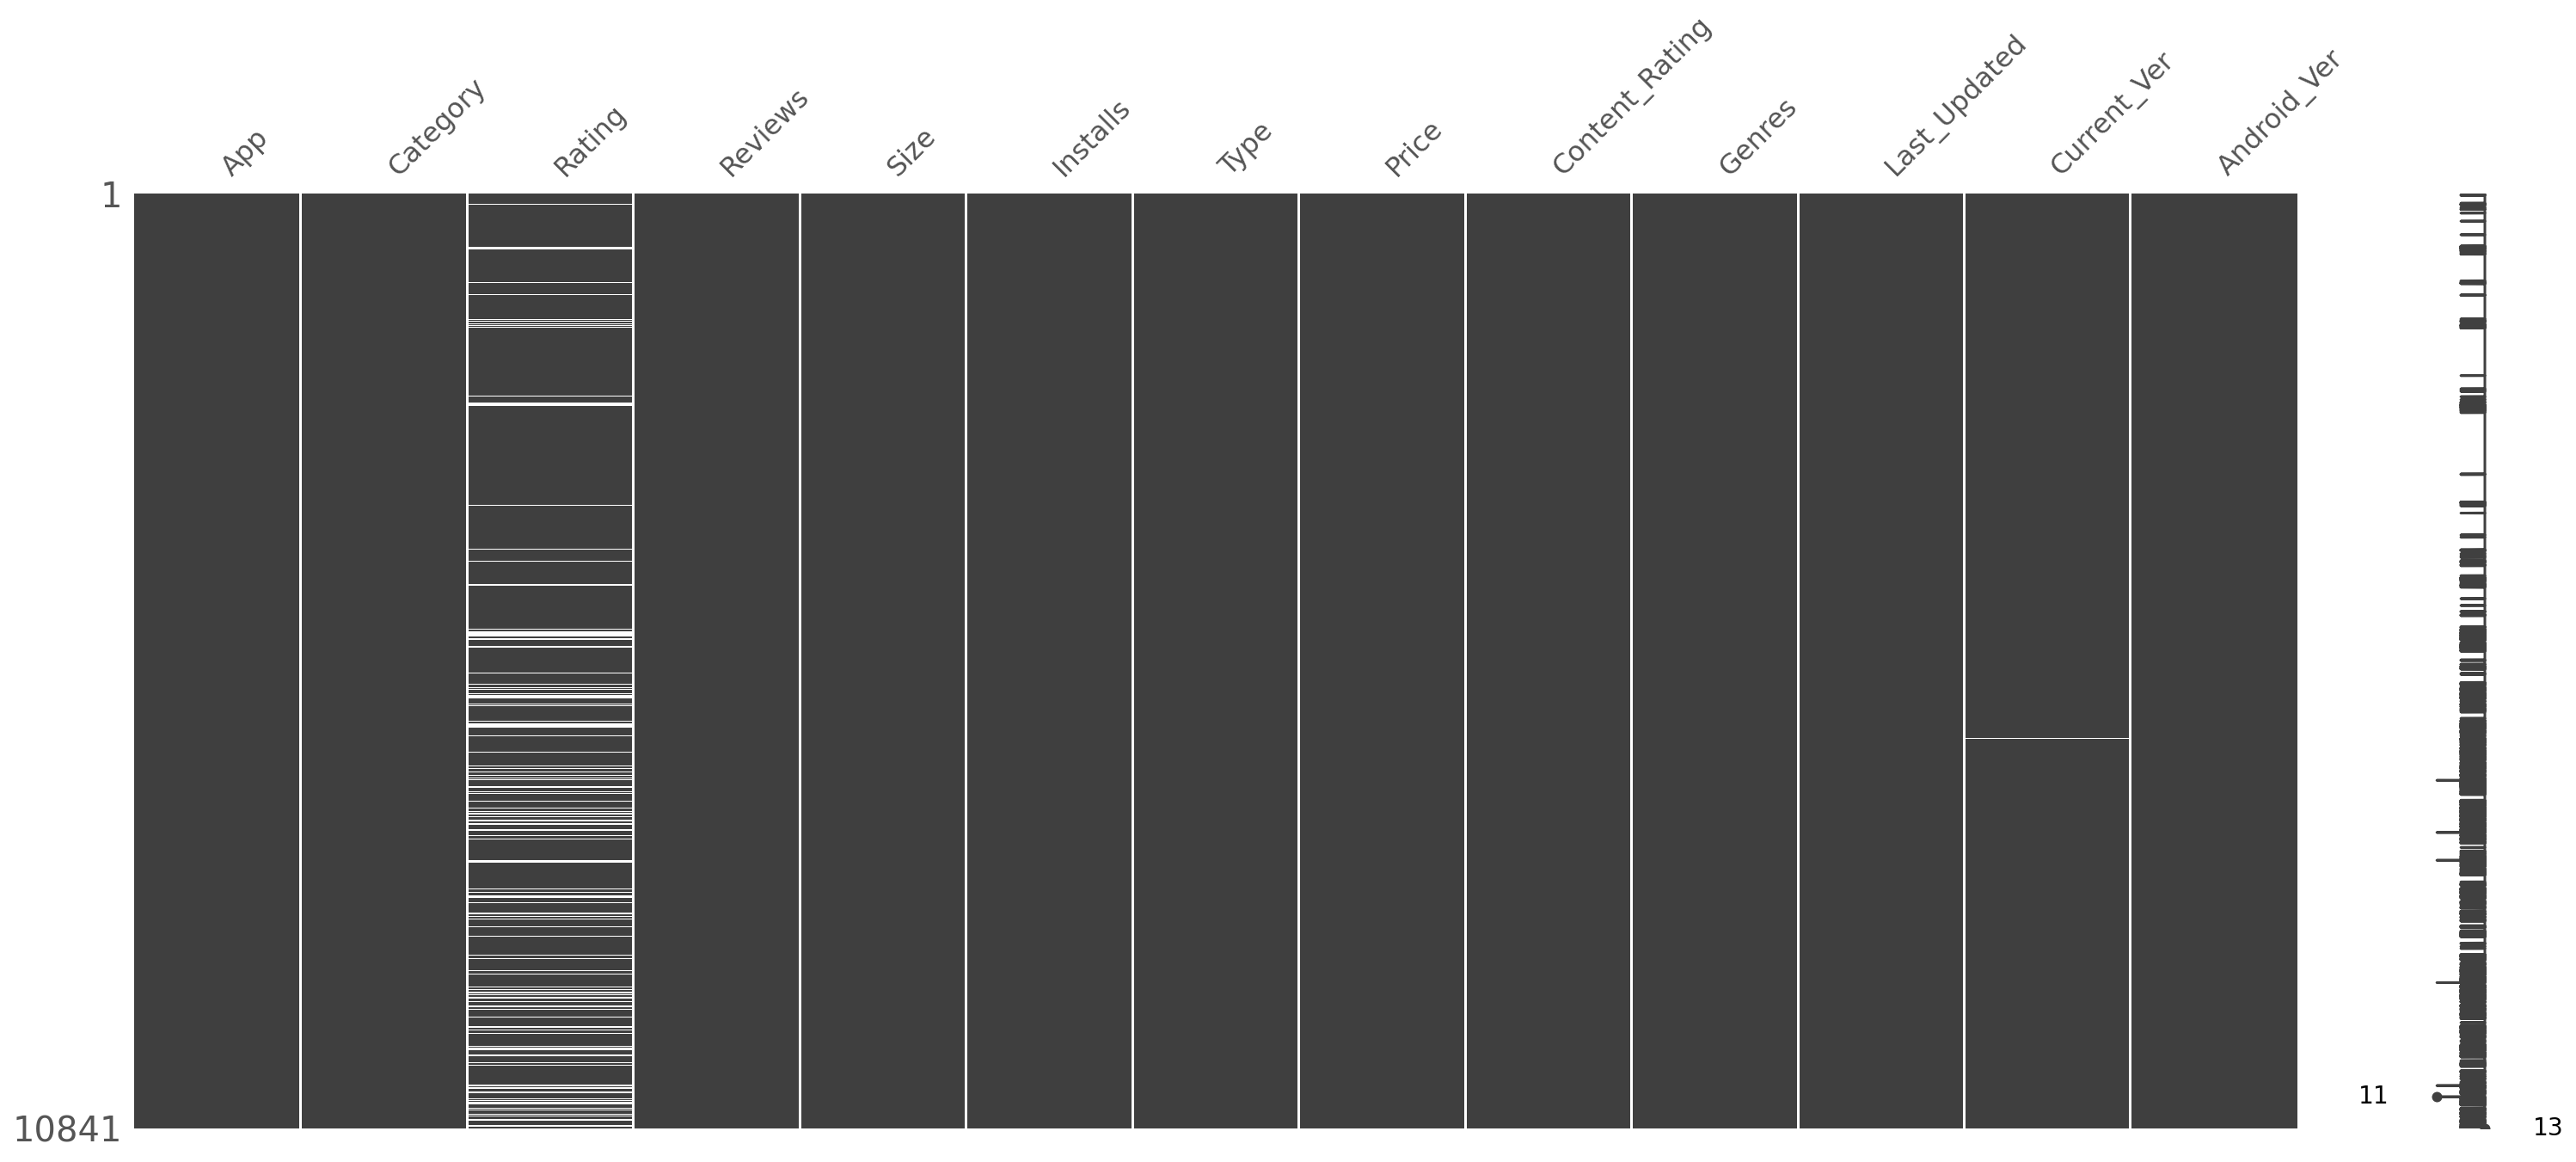

In [6]:
# Visualize missing values as a matrix 
msno.matrix(df) 
plt.show();

There are many missing values in the Rating attribute (~13.6% of the data). Considering this will be a potential predictor for our target variable we will explore some options to impute value to these records. <br>
There are a few instances missing for 'current version', 'android version', 'content rating', and 'type' that we can safely drop since they are only 13 records of data out of the 10841 in the dataset.

Next, we perform analysis on the response. Considering installs is a string, we perform a value counts to see the number of instances for each value.

In [7]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

Our response in its raw state has some issues, and we will need to address them by:
- Removing the '+' sign.
- Exclude the invalid values (like the 'Free' record).
- Changing the data type to integer to be able to check which records are above 1 million and which ones are below that threshold.

Considering the nature of the data, we will analyze our explanatory features one by one, as some of them (like App and Genre) might not be feasible to plot them in a bar graph because of the large number of different values.

### Android_Ver

We check the number of records for each distinct value.

In [8]:
# Min required Android version
df.groupby(['Android_Ver']).size().to_frame('occurences').reset_index().sort_values(by = 'occurences', ascending = False)

,Android_Ver,occurences
17,4.1 and up,2451
15,4.0.3 and up,1501
13,4.0 and up,1375
32,Varies with device,1362
20,4.4 and up,980
8,2.3 and up,652
25,5.0 and up,601
18,4.2 and up,394
9,2.3.3 and up,281
7,2.2 and up,244


Here we see a big number of different Android versions as the minimum requirement. This attribute can be considered categorical ordinal, and we can create groups to have records which minimum android would be 1.0, 2.0, 3.0, 4.0, 4.1, 4.2, 4.3, 4.4, 5.0, 6.0. We could see that the increments can be made one by one with a few exceptions for versions 4.1 until 4.4 for the number of records that each of them have.

### Application name
We look at the occurrences of each Application name.

In [9]:
df.groupby(['App']).size().to_frame('occurences').reset_index().sort_values(by='occurences', ascending=False)

,App,occurences
7302,ROBLOX,9
1934,"CBS Sports App - Scores, News, Stats & Watch Live",8
2364,Candy Crush Saga,7
3504,Duolingo: Learn Languages Free,7
101,8 Ball Pool,7
...,...,...
3310,Display Phone Screen On TV,1
3311,Displaying You VR,1
3312,Ditto CP Calculator GO,1
3313,Dive-Store.ch,1


There are 9660 unique names, but there seems to be some names that are duplicates. Let’s explore the one at the top.

In [10]:
# taking the first one that is 8 times
df[df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We these records have the same information for all their columns except for the 'Reviews' attribute. We see the highest number of reviews is 4450890 and the lowest is 4443407 (with a difference of 7400). Considering the small percentage this represents of the several million reviews this is not a big difference. We will check another App to see if we have a similar pattern.

In [11]:
# taking the third one that is 7 times
df[df.App == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


We see the same pattern, so we will take the approach of deleting the duplicates by keeping only one record. After making some research on the Kaggle discussion about this topic [Link](https://www.kaggle.com/lava18/google-play-store-apps/discussion?search=duplicate) we don't see a clear answer about why this happened, but as we saw relatively small differences on the only column (Reviews) that has different values, the approach that we will take is to keep the last record added (highest index) for each App where we found duplicates. This will be done in the data prep section.

### Category
We look at the unique values.

In [12]:
#application Genres
print('Application genre unique value counts: ', len(df.Category.unique()))
print(df.Category.unique()) #taking only first 20 records

Application genre unique value counts:  34
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


We have 34 different application __Categories__. We decide to not group this data together as the categories can be considered different on their own. We will delete the Genre (category) 1.9 as it is not indicative for a valid genre type.

### Content Rating

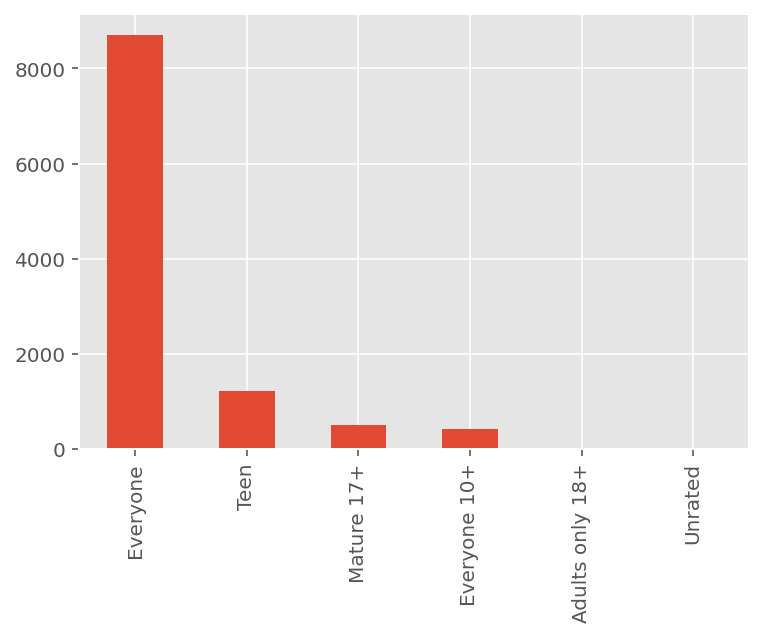

In [13]:
df.Content_Rating.value_counts().plot(kind = 'bar');

We can see that most of the apps content are for all ages (everyone), followed by Teen, then above 17 years old. We can drop 'adults only 18+' and 'unrated' as they have a insignificant number of instances and create dummy columns for the remaining 4.

### Current_Ver

In [14]:
# Current version of the app available on Play Store (as when scraped)
df.groupby(['Current_Ver']).size().to_frame('occurences').reset_index().sort_values(by = 'occurences', ascending = False)

,Current_Ver,occurences
2765,Varies with device,1459
113,1.0,809
277,1.1,264
424,1.2,178
1017,2.0,151
...,...,...
1125,2.1.6579,1
1122,2.1.54,1
1118,2.1.3181,1
1117,2.1.3.2,1


This attribute refers to the current version of the app available on Play Store (as when scraped). 
An application can change versions every time developers uploads new changes to the Play Store, and considering this is the version visible to users and following specifications for [Android](https://developer.android.com/studio/publish/versioning) this setting can be specified as a raw string or as a reference to a string resource. There is no specific pattern that different Application creators would follow to name their new app version, hence this attribute would not be indicative of the number of installs and we will exclude it from our analysis. 

### Genres
Considering that an app can belong to multiple genres (apart from its main category), and each of them is separated by a semicolon we check how many Genres we can have in the records.

In [15]:
s = df.Genres
s.str.count(';').to_frame().Genres.value_counts()

0    10343
1      498
Name: Genres, dtype: int64

We have 10343 apps that belong to a single Genre, and 498 records that belong to 2. Now we look closer at the data.

In [16]:
# Genres
df.groupby(['Genres']).size().to_frame('occurences').reset_index().sort_values(by = 'occurences', ascending = False)

,Genres,occurences
109,Tools,842
52,Entertainment,623
39,Education,549
72,Medical,463
22,Business,460
...,...,...
88,Puzzle;Education,1
20,Books & Reference;Creativity,1
95,Role Playing;Education,1
94,Role Playing;Brain Games,1


We have 120 different application __Genres__, and we see for example the record with information about a date will need to be deleted.

As mentioned we will create one column for the main/primary genre and one for the secondary genre.

### Last_Updated

In [17]:
# Date when the app was last updated on Play Store
df.groupby(['Last_Updated']).size().to_frame('occurences').reset_index().sort_values(by='occurences', ascending=False)

,Last_Updated,occurences
193,"August 3, 2018",326
156,"August 2, 2018",304
680,"July 31, 2018",294
116,"August 1, 2018",285
675,"July 30, 2018",211
...,...,...
670,"July 30, 2012",1
676,"July 31, 2013",1
688,"July 6, 2014",1
692,"July 7, 2015",1


We have 1378 different Last_Updated dates, we will need to convert them to a data type compatible with a machine learning model. We will take the approach of separating the year, month and day in different columns.

### Price

In [18]:
# Price
df.groupby(['Price']).size().to_frame('occurences').reset_index().sort_values(by='occurences', ascending=False)

,Price,occurences
91,0,10040
0,$0.99,148
41,$2.99,129
15,$1.99,73
74,$4.99,72
...,...,...
53,$3.61,1
54,$3.88,1
11,$1.75,1
58,$30.99,1


We will need to convert the values to floating point numbers removing the dollar sign. Also delete the 'Everyone' record as it is an invalid price.

### Rating

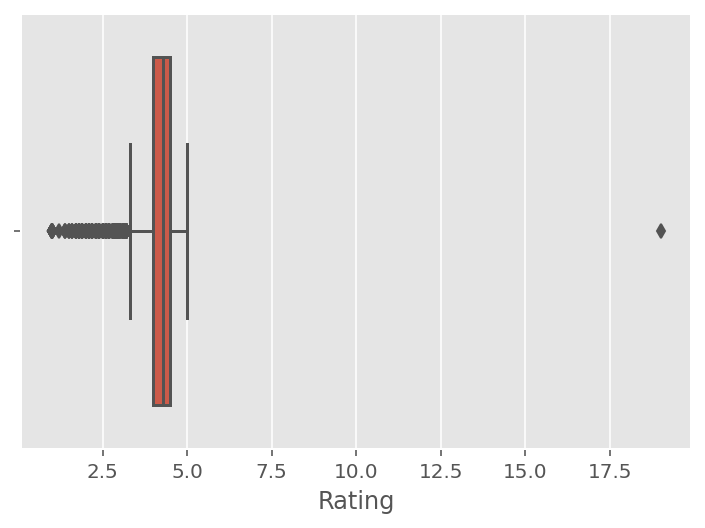

In [19]:
# Rating
sns.boxplot(x="Rating", data = df);

Considering rating can't have values greater than 5.0 we will delete the record around 19.

### Reviews

This column is stored as a string so we will need to convert to integer to be able to create a boxplot, but we can see the number of occurrences for each value.

In [20]:
# Reviews
df.groupby(['Reviews']).size().to_frame('occurences').reset_index().sort_values(by='occurences', ascending=False)

,Reviews,occurences
0,0,596
1,1,272
1744,2,214
2854,3,175
3588,4,137
...,...,...
2173,234110,1
2172,234,1
2171,23393,1
2170,2339098,1


We will need to change the data type to integer as it is currently string. We also see an extremely high value with 2339098, which we will further investigate, it can belong to a well-known application.

### Size

In [21]:
# Size
df.groupby(['Size']).size().to_frame('occurences').reset_index().sort_values(by='occurences', ascending=False)

,Size,occurences
461,Varies with device,1695
19,11M,198
23,12M,196
28,14M,194
24,13M,191
...,...,...
203,470k,1
201,467k,1
200,460k,1
199,45k,1


We see that we have different units to measure the size, as some records are in Megabytes and other in kilobytes, we will convert everything to a unique unit. Also we will need to create a new column called 'size_varies' for the 1695 apps which sizes is different depending the device.

### Type

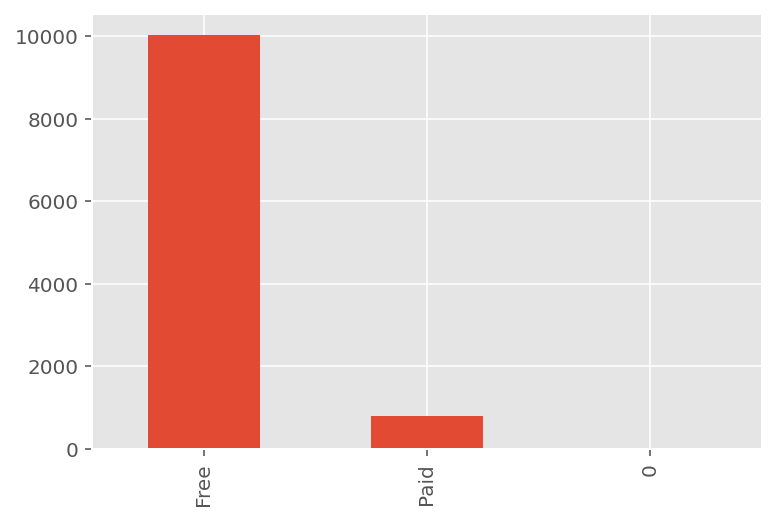

In [22]:
# Type: Paid or Free
df.Type.value_counts().plot(kind='bar');

We see that most of the apps are free of charge. We will have 1 column for 'type_free' and other for 'type_paid' and exclude the records with type 0 as it is not valid.

In [23]:
cat = ['App','Category','Type','Content_Rating','Genres','Last_Updated','Current_Ver','Android_Ver']
numeric = ['Rating','Reviews','Size','Installs','Price']

# Data Preparation

For our data prep we will start with our response variable and then go through each of the explanatory.

### Installs

For the response we will:
- Remove the `+` sign and the `,` sign.
- Exclude the record that refers to 'Free'
- Cast the column to numeric.
- Create a new column 'above_1_million', which will be set to 'yes' for those apps that have more than 1 million and to 'no' for the others. This will be our new response variable. For purposes of our EDA before and after Data Prep we will maintain these values in our response and change it to 1 and 0 before our machine learning models.
- Drop the 'Installs' column.

In [24]:
# exclude the 'Free' record
df = df[df['Installs'] != 'Free']

# remove the '+' and the ',' sign
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))

# convert to numeric
df.Installs = pd.to_numeric(df.Installs)

# sanity check
df.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [25]:
# create new response variable
df['above_1_million'] = ['yes' if element >= 1000000 else 'no' for element in df['Installs']]


# sanity check
df.above_1_million.value_counts()

no     6429
yes    4411
Name: above_1_million, dtype: int64

Here we manufactured a new feature called above 1 million to under, which we are going to treat as our response variable. We can see that the data is imbalanced in favor of the apps that have less than 1 million downloads.

This response variable was created from the Installs variable. Since the Installs variable has completed its purpose successfully we no longer need the Installs column and therefore we shall remove it from our dataframe as it would not be valid for our analysis to use this variable as a predictor.

In [26]:
del df['Installs']

### Android_Ver

For this attribute we will:
- Exclude the 3 Nan records.
- Clean the text to change from '1.0 and up' to '1.0', and same logic for the rest of the versions, which will change the data type from string to float.
- Create group (bins) for 1.0, 2.0, 3.0, 4.0, 4.0.3, 4.1, 4.2, 4.3, 4.4 (including Android 4.4W which extends support for Wearables [Link](https://stackoverflow.com/questions/28170345/what-exactly-is-android-4-4w-vs-4-4-and-what-about-5-0-1)), 5.0, 6.0. We are also grouping sparse classes.
- Create a new column for those records whose minimum android version varies with the device.
- Exclude the following records as they won't be able to be bucketed in any of the groups.
    - 2.2 - 7.1.1 (1 instance)
    - 4.1 - 7.1.1 (2 instances)
    - 5.0 - 7.1.1 (1 instance)
    - 5.0 - 6.0 (1 instance). We exclude it since we can't determine to which of the groups should be in, if 5.0 or 6.0.
    - 7.0 - 7.1.1 (1 instance)
- Cast the column to numeric. We will treat this column as categorical ordinal.

In [27]:
# exclude 3 null value records
df = df[df['Android_Ver'].notna()]

# replace 'and up' with ''
df['Android_Ver'] = df['Android_Ver'].str.replace(' and up','')
df['Android_Ver'] = df['Android_Ver'].str.replace('4.4W','4.4')

# creating new column for apps whose android version varies with device
df['Android_ver_varies'] = [1 if element == 'Varies with device' else 0 for element in df['Android_Ver']]

# replace 'Varies with device' with 0.0
df['Android_Ver'] = df['Android_Ver'].str.replace('Varies with device','0.0')

# excluding records that are not included in the bins
df = df[(df.Android_Ver != '5.0 - 7.1.1') & (df.Android_Ver != '2.2 - 7.1.1')
       & (df.Android_Ver != '4.1 - 7.1.1') & (df.Android_Ver != '4.0.3 - 7.1.1')
       & (df.Android_Ver != '7.0 - 7.1.1') & (df.Android_Ver != '5.0 - 8.0')
       & (df.Android_Ver != '5.0 - 6.0')]

# change to string to create bins
# 1.0, 2.0, 3.0, 4.0, 4.0.3, 4.1, 4.2, 4.3, 4.4, 6.0, 7.0, 8.0
df['Android_Ver']= df['Android_Ver'].astype(str)
df['Android_Ver'] = [(element[0] + '.0') if element[0] != '4' else element[:3] for element in df['Android_Ver']]

# change data type to float
df['Android_Ver']= df['Android_Ver'].astype(float)

In [28]:
#sanity check
df['Android_Ver'].value_counts()

4.0    2876
4.1    2451
0.0    1362
2.0    1350
4.4     992
5.0     625
4.2     394
3.0     287
4.3     243
1.0     138
6.0      60
7.0      45
8.0       6
Name: Android_Ver, dtype: int64

We have our bins created and transformed the attribute to ordinal.

### App (application name)

As we mentioned in the EDA we will remove duplicates in the App name keeping the last record.

In [29]:
#before removing duplicates
df.shape

(10829, 14)

In [30]:
#removing duplicates
df.drop_duplicates(subset=['App'], keep='last', inplace=True)

#sanity check
df.App.value_counts().to_frame()

,App
H TV,1
CP Brown English-Telugu Dictionary,1
"Even - organize your money, get paid early",1
Cook 'n Learn Smart Kitchen,1
"My Effectiveness: To do, Tasks",1
...,...
Satellite Director,1
Room planner: Interior & Floorplan Design for IKEA,1
"Meditation Music - Relax, Yoga",1
VUE: video editor & camcorder,1


Now we only have one instance of each App name, and considering that this column is like an 'Id' column we will exclude it from our analysis as it would not provide any meaningful impact to the response

In [31]:
# exclude column
del df['App']

# sanity check
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'above_1_million', 'Android_ver_varies'],
      dtype='object')

### Category
For this attribute we will:
 - Exclude the single record that refers to '1.9', as it is an invalid observation.
 - Add the column to a list that we will use to create dummy columns.
 - Group sparse data for those that have less than 100 observations and create new category called 'other'.

In [32]:
# exclude the 'Free' record
df = df[df['Category'] != '1.9']

# create a list called dummies and add 'Category'
dummies = ['Category']

In [33]:
# create dataframe and define 'other' as new Category
categ = df.Category.value_counts().to_frame().reset_index()
categ.columns = ['value','counts']
new_list = categ[categ.counts < 100].value.to_list()

df.Category = ['Other' if (element in new_list) else element for element in df.Category]
df.Category.value_counts().to_frame().reset_index()

,index,Category
0,FAMILY,1906
1,GAME,925
2,TOOLS,828
3,Other,694
4,BUSINESS,418
5,MEDICAL,396
6,PERSONALIZATION,373
7,PRODUCTIVITY,373
8,LIFESTYLE,368
9,FINANCE,345


### Content Rating

For this attribute we will:
 - Exclude the observations that refers to 'Adults only 18+' and 'Unrated'. Since we have only 5 observations between both it is safe to exclude them.
 - Add the column to a list that we will use to create dummy columns. We think it is better to treat this as a nominal attribute since we have a classification as 'Everyone' which includes users from any ages. According to the [Link](https://support.google.com/googleplay/answer/6209544?hl=en) for North and South America means that the content is generally suitable for all ages. May contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

In [34]:
# exclude the 'Free' record
df = df[(df['Content_Rating'] != 'Adults only 18+') & (df['Content_Rating'] != 'Unrated')]

# create a list called dummies and add 'Category'
dummies.append('Content_Rating')

### Current_Ver

For this attribute we will exclude it from our analysis as it does not provide any meaningful impact on our response.

In [35]:
del df['Current_Ver']

### Genres

If we recall from the EDA, we saw that we have 10343 apps that belong to a single Genre, and 498 records that belong to 2. The tasks that we will perform are:
- Split this column into __primary_genre__ with the Genre that is to the left of the semicolon and __secondary_genre__ to the one that is to the right of the semicolon.
- Filling missing values for 'secondary_genre' with zeros.
- Delete original column 'Genres'
- Add both columns to the list that we will use to create dummy columns.
- Group sparse data.

In [36]:
# create new columns, primary and secondary genre
df['primary_genre'], df['secondary_genre'] = df['Genres'].str.split(';', 1).str

#filling null values with zero
df['secondary_genre'].fillna('missing', inplace=True)

# exclude column Genres
del df['Genres']

# add both columns to create dummies
dummies.append('primary_genre')
dummies.append('secondary_genre')

# sanity check
print('Total of primary genres: ', df['primary_genre'].value_counts().sum())
print('Total of secondary genres: ', df['secondary_genre'].value_counts().sum())

Total of primary genres:  9643
Total of secondary genres:  9643


C:\Users\julir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [37]:
# create dataframe and define 'other' as new Category
primary = df.primary_genre.value_counts().to_frame().reset_index()
primary.columns = ['value','counts']
new_list = primary[primary.counts < 100].value.to_list()

df.primary_genre = ['Other' if (element in new_list) else element for element in df.primary_genre]
df.primary_genre.value_counts().to_frame().reset_index().head()

,index,primary_genre
0,Other,1029
1,Tools,827
2,Entertainment,591
3,Education,580
4,Business,418


### Last Updated Date
This attribute is a date feature which isn't formatted as a date but rather as an object and it needs to be reformatted into date format.

In [38]:
df.Last_Updated.head()

0    January 7, 2018
2     August 1, 2018
3       June 8, 2018
4      June 20, 2018
5     March 26, 2017
Name: Last_Updated, dtype: object

In [39]:
df.Last_Updated = pd.to_datetime(df.Last_Updated)
df.Last_Updated.head()

0   2018-01-07
2   2018-08-01
3   2018-06-08
4   2018-06-20
5   2017-03-26
Name: Last_Updated, dtype: datetime64[ns]

Separating the date into year, month and day

In [40]:
df['last_updated_year'] = df['Last_Updated'].dt.year
df['last_updated_month'] = df['Last_Updated'].dt.month
df['last_updated_day'] = df['Last_Updated'].dt.day

#sanity check
df[['last_updated_year','last_updated_month','last_updated_day']].head()

,last_updated_year,last_updated_month,last_updated_day
0,2018,1,7
2,2018,8,1
3,2018,6,8
4,2018,6,20
5,2017,3,26


In [41]:
del df['Last_Updated']

### Price
The `$` needs to be removed and the column needs to be casted to numeric.

In [42]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))

df.Price.unique()[0:10]

array(['0', '4.99', '3.99', '1.49', '2.99', '7.99', '3.49', '1.99',
       '5.99', '6.99'], dtype=object)

In [43]:
df.Price = pd.to_numeric(df.Price)

df.Price.unique()[0:10] # Sanity check

array([0.  , 4.99, 3.99, 1.49, 2.99, 7.99, 3.49, 1.99, 5.99, 6.99])

### Rating

We check to see the outlier above 17.

In [44]:
df.Rating.describe()

count    8183.000000
mean        4.172956
std         0.536573
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The oulier is no longer there, however we see that we have 8183 records with values.

### Reviews
It seems like they are string values and they need to be converted to a numeric type.

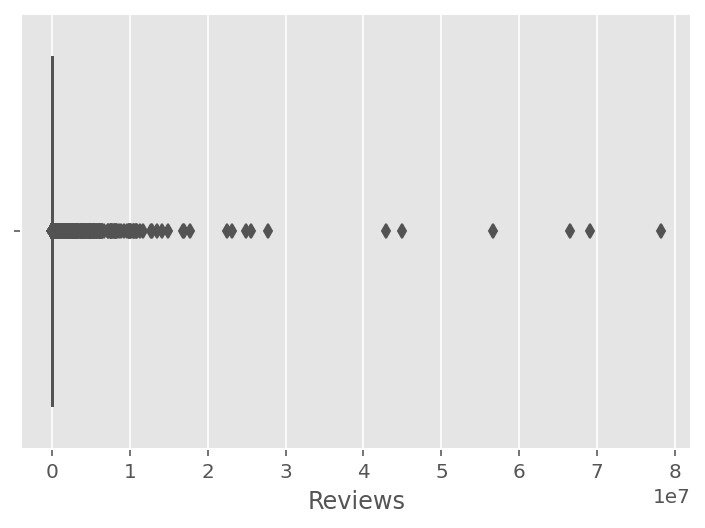

In [45]:
# Convert to numeric
df.Reviews = pd.to_numeric(df.Reviews)

# Rating
sns.boxplot(x="Reviews", data = df);

Let's check the records with reviews above 40 million

In [46]:
df[df.Reviews > 40000000]

,Category,Rating,Reviews,Size,Type,Price,Content_Rating,Android_Ver,above_1_million,Android_ver_varies,primary_genre,secondary_genre,last_updated_year,last_updated_month,last_updated_day
3904,COMMUNICATION,4.4,69109672,Varies with device,Free,0.0,Everyone,0.0,yes,1,Communication,missing,2018,8,3
3909,SOCIAL,4.5,66509917,Varies with device,Free,0.0,Teen,0.0,yes,1,Social,missing,2018,7,31
3943,SOCIAL,4.1,78128208,Varies with device,Free,0.0,Teen,0.0,yes,1,Social,missing,2018,8,3
3986,FAMILY,4.6,44881447,98M,Free,0.0,Everyone 10+,4.1,yes,0,Other,missing,2018,7,15
4005,TOOLS,4.7,42916526,Varies with device,Free,0.0,Everyone,0.0,yes,1,Tools,missing,2018,8,3
4104,COMMUNICATION,4.0,56642847,Varies with device,Free,0.0,Everyone,0.0,yes,1,Communication,missing,2018,8,1


We see that applications like WhatsApp, Instagram and Facebook are at the top, so we can consider this number of reviews as valid observations. If we check the google play store now these numbers are actually much higher (WhatsApp is at 118 million [Link](https://play.google.com/store/apps/details?id=com.whatsapp)) reflecting the timeframe between now and when the data was scraped.



### Size
There seems to be data points were the sizes are expressed in megabytes and others are expressed in kilobytes so when to cater to each of them seperately.

In [47]:
# creating new column for apps whose android version varies with device
df['size_varies'] = [1 if element == 'Varies with device' else 0 for element in df['Size']]

# creating new column for apps whose android version varies with device
df.Size = df.Size.replace('Varies with device','0')

In [48]:
# change k and M to scientific notation
df.Size = df.Size.str.replace('k','e+3') 
df.Size = df.Size.str.replace('M','e+6')

#sanity check
df.Size = pd.to_numeric(df.Size)
df.Size.head()

0    19000000.0
2     8700000.0
3    25000000.0
4     2800000.0
5     5600000.0
Name: Size, dtype: float64

### Type

Will change name 'Type' for 'Free' and assign a 1 for those records and 0 for the ones that are paid. We also delete the only null value for this attribute.

In [49]:
# renaming column
df = df[df.Type.notna()]
df.rename(columns={"Type": "free_app"}, inplace=True)
df.free_app = df.free_app.str.replace('Free','1')
df.free_app = df.free_app.str.replace('Paid','0')
df.free_app = pd.to_numeric(df.free_app)

#sanity check
df.free_app.value_counts()

1    8889
0     753
Name: free_app, dtype: int64

# Prepped Data Review

### Response variable 
Our new response variable was constructed from the Installs variable and it is named Above_1_million. Indicating whether the application had above 1 million installs.

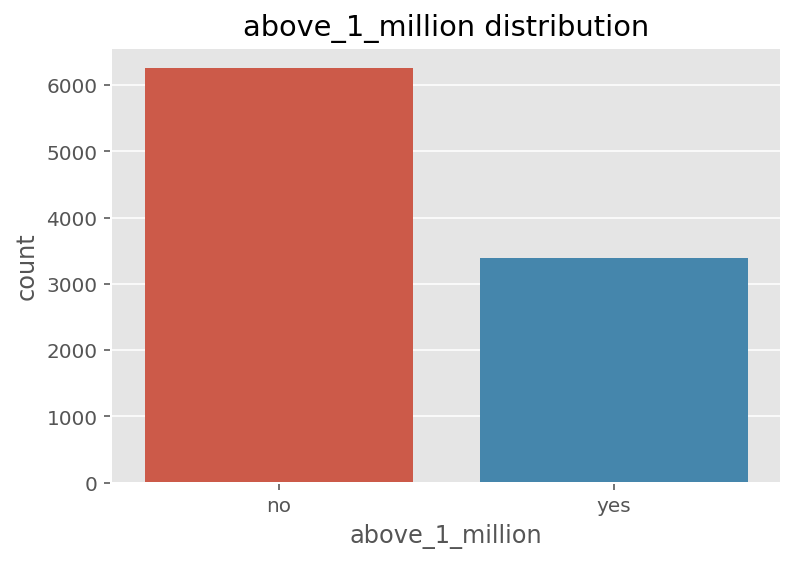

In [50]:
# 
plt.title("above_1_million Distribution")
plt.ylabel("counts")
plt.xlabel("Is it above 1 million")
sns.countplot(x = 'above_1_million', data = df).set_title("above_1_million distribution");

We can see that we have an imbalance response variable, and this is something we will considering in our machine learning models approach, adjusting the corresponding hyperparameters.

Below we plot our categorical features vs the response, first taking the ones that have a higher number of unique values, like Caterogy, primary_genre and secondary_genre. Then we create the corresponding graph for our numeric features vs the response.

In [51]:
numeric = ['Rating', 'Reviews', 'Size', 'Price']
categoric_together = ['Android_Ver','last_updated_year','last_updated_month',
                      'free_app', 'Android_ver_varies', 'size_varies','Content_Rating']

### Categorical Features

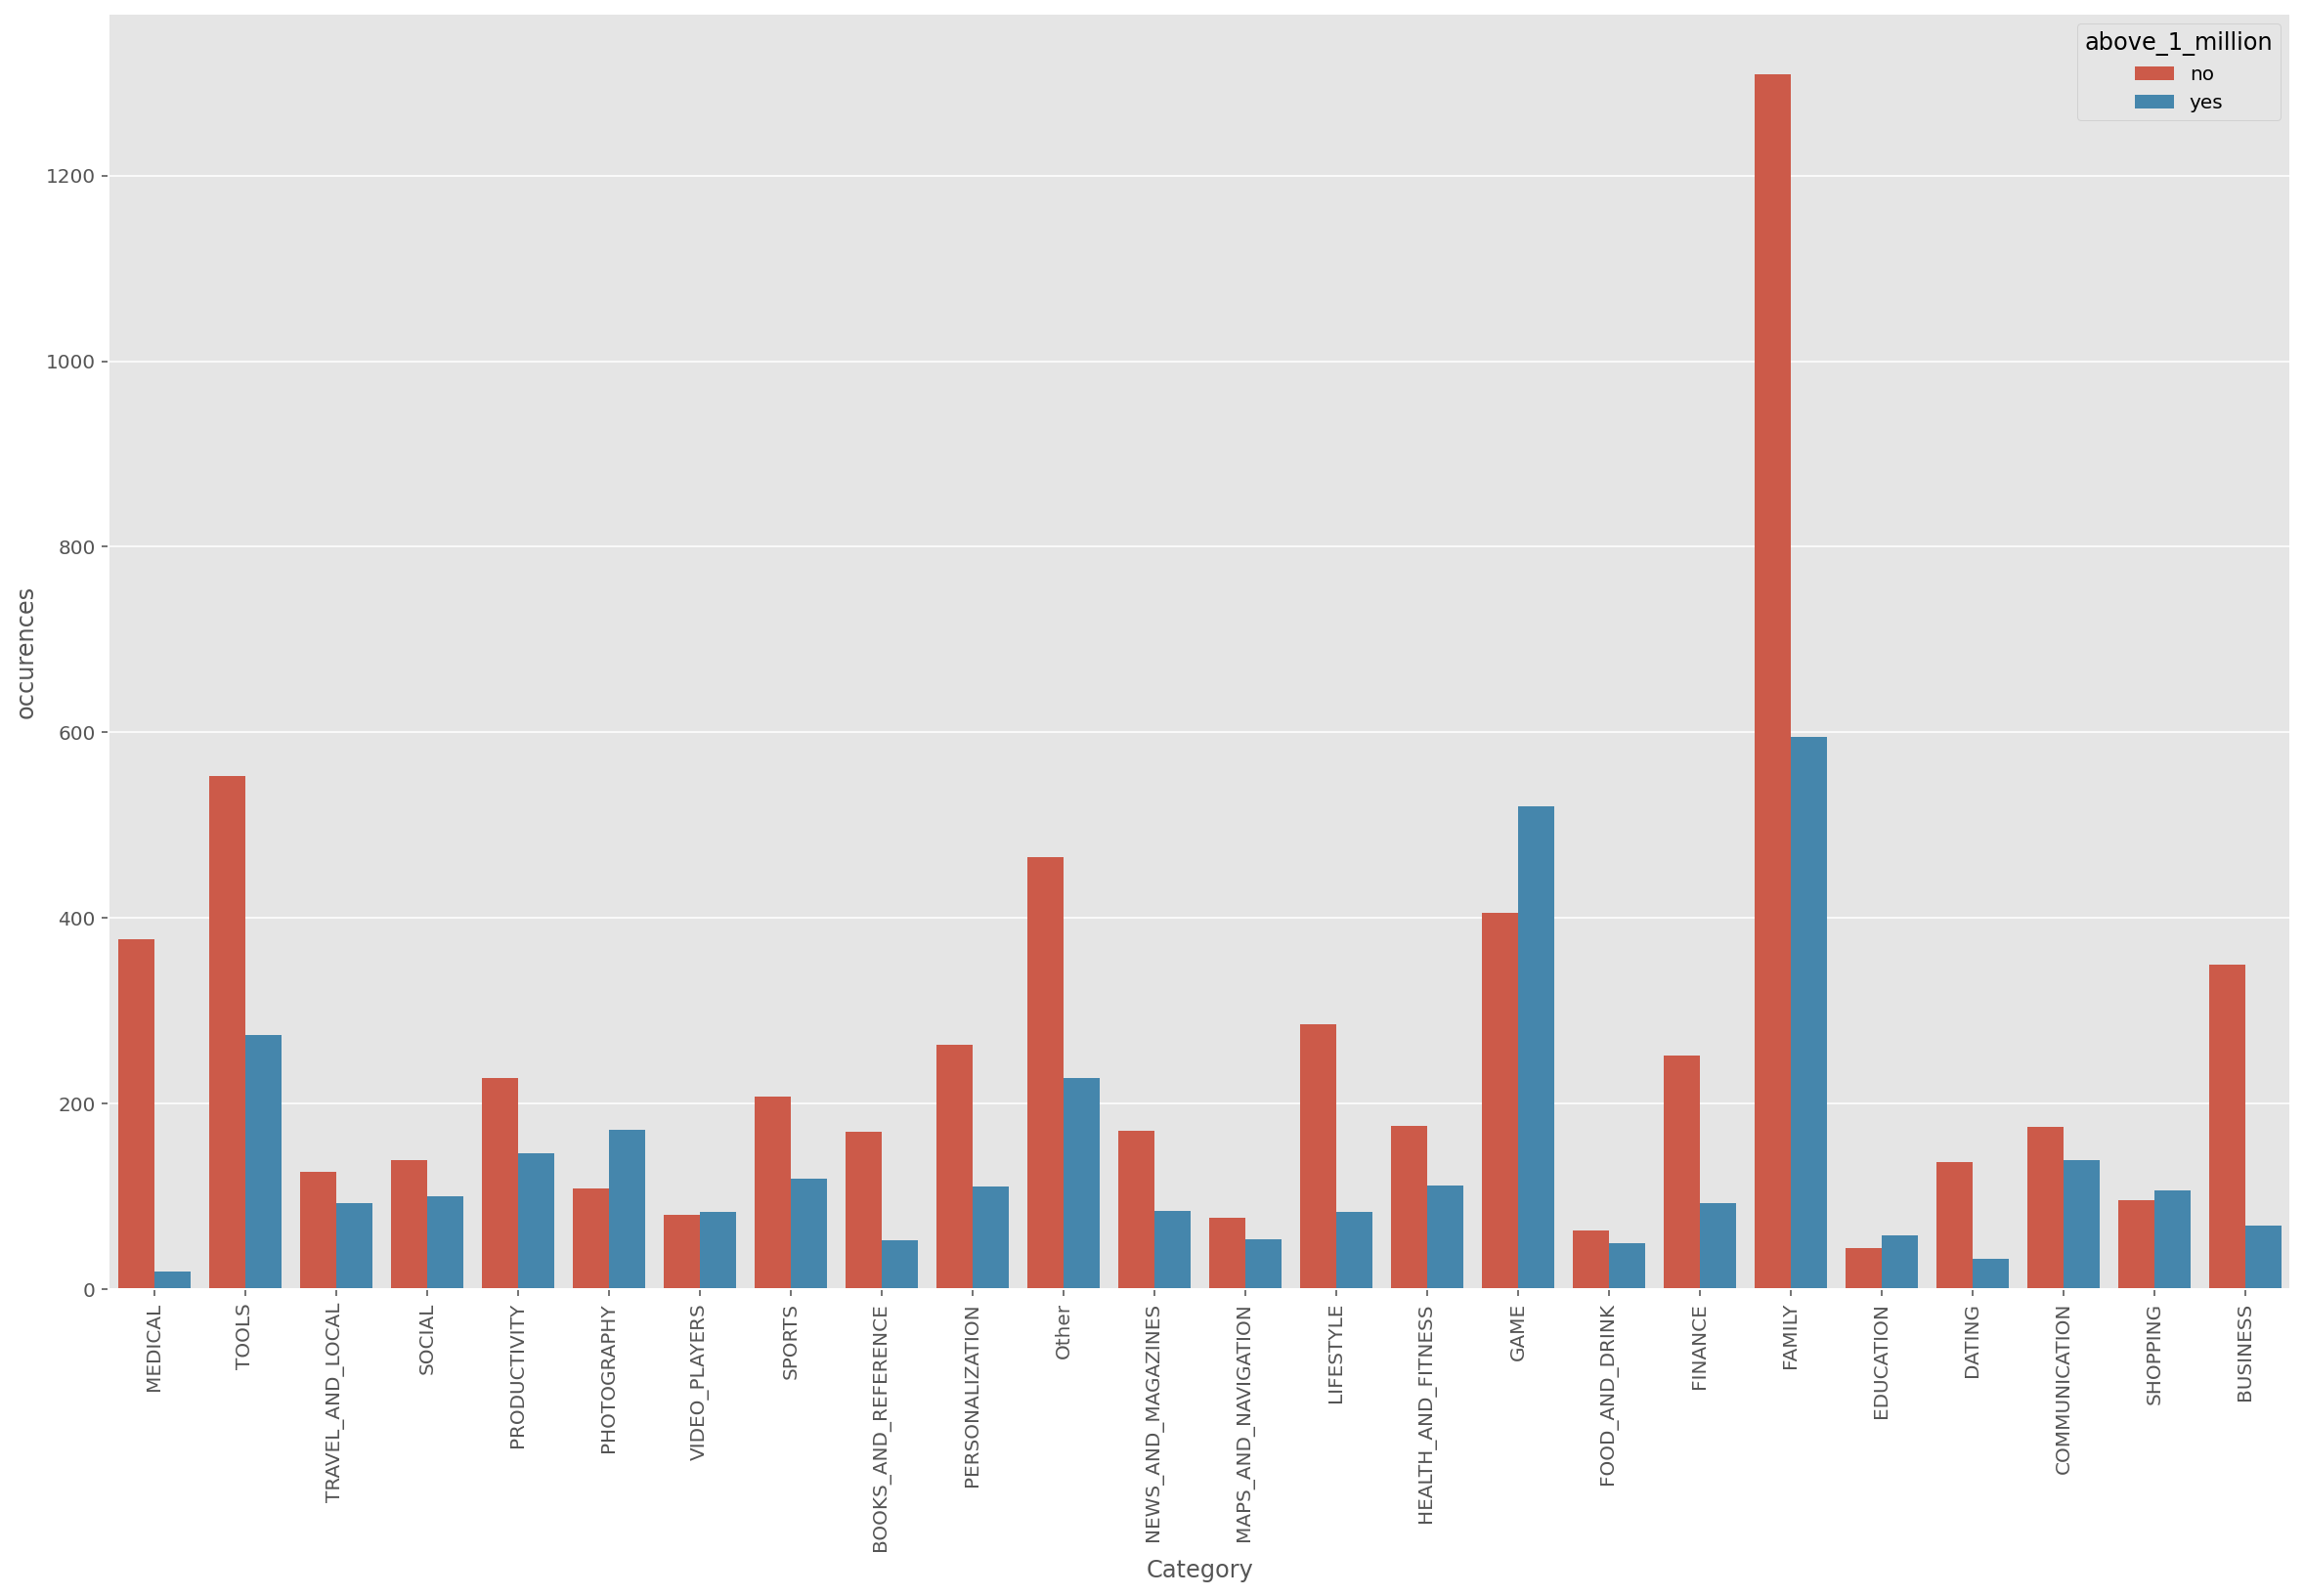

In [52]:
#Category
plt.figure(figsize=(20,12))
dt = df.groupby(['Category','above_1_million']).size().to_frame('occurences').reset_index().sort_values(by='above_1_million', ascending=False)
chart = sns.barplot(x='Category', y='occurences', hue='above_1_million', data=dt.sort_values("above_1_million"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

We see our 'Other' category that was grouped as the result of sparse data, and this attribute might be a good predictor but there is not a clear pattern. The only category that seem to have more apps with above 1 million downloads is 'Game'.

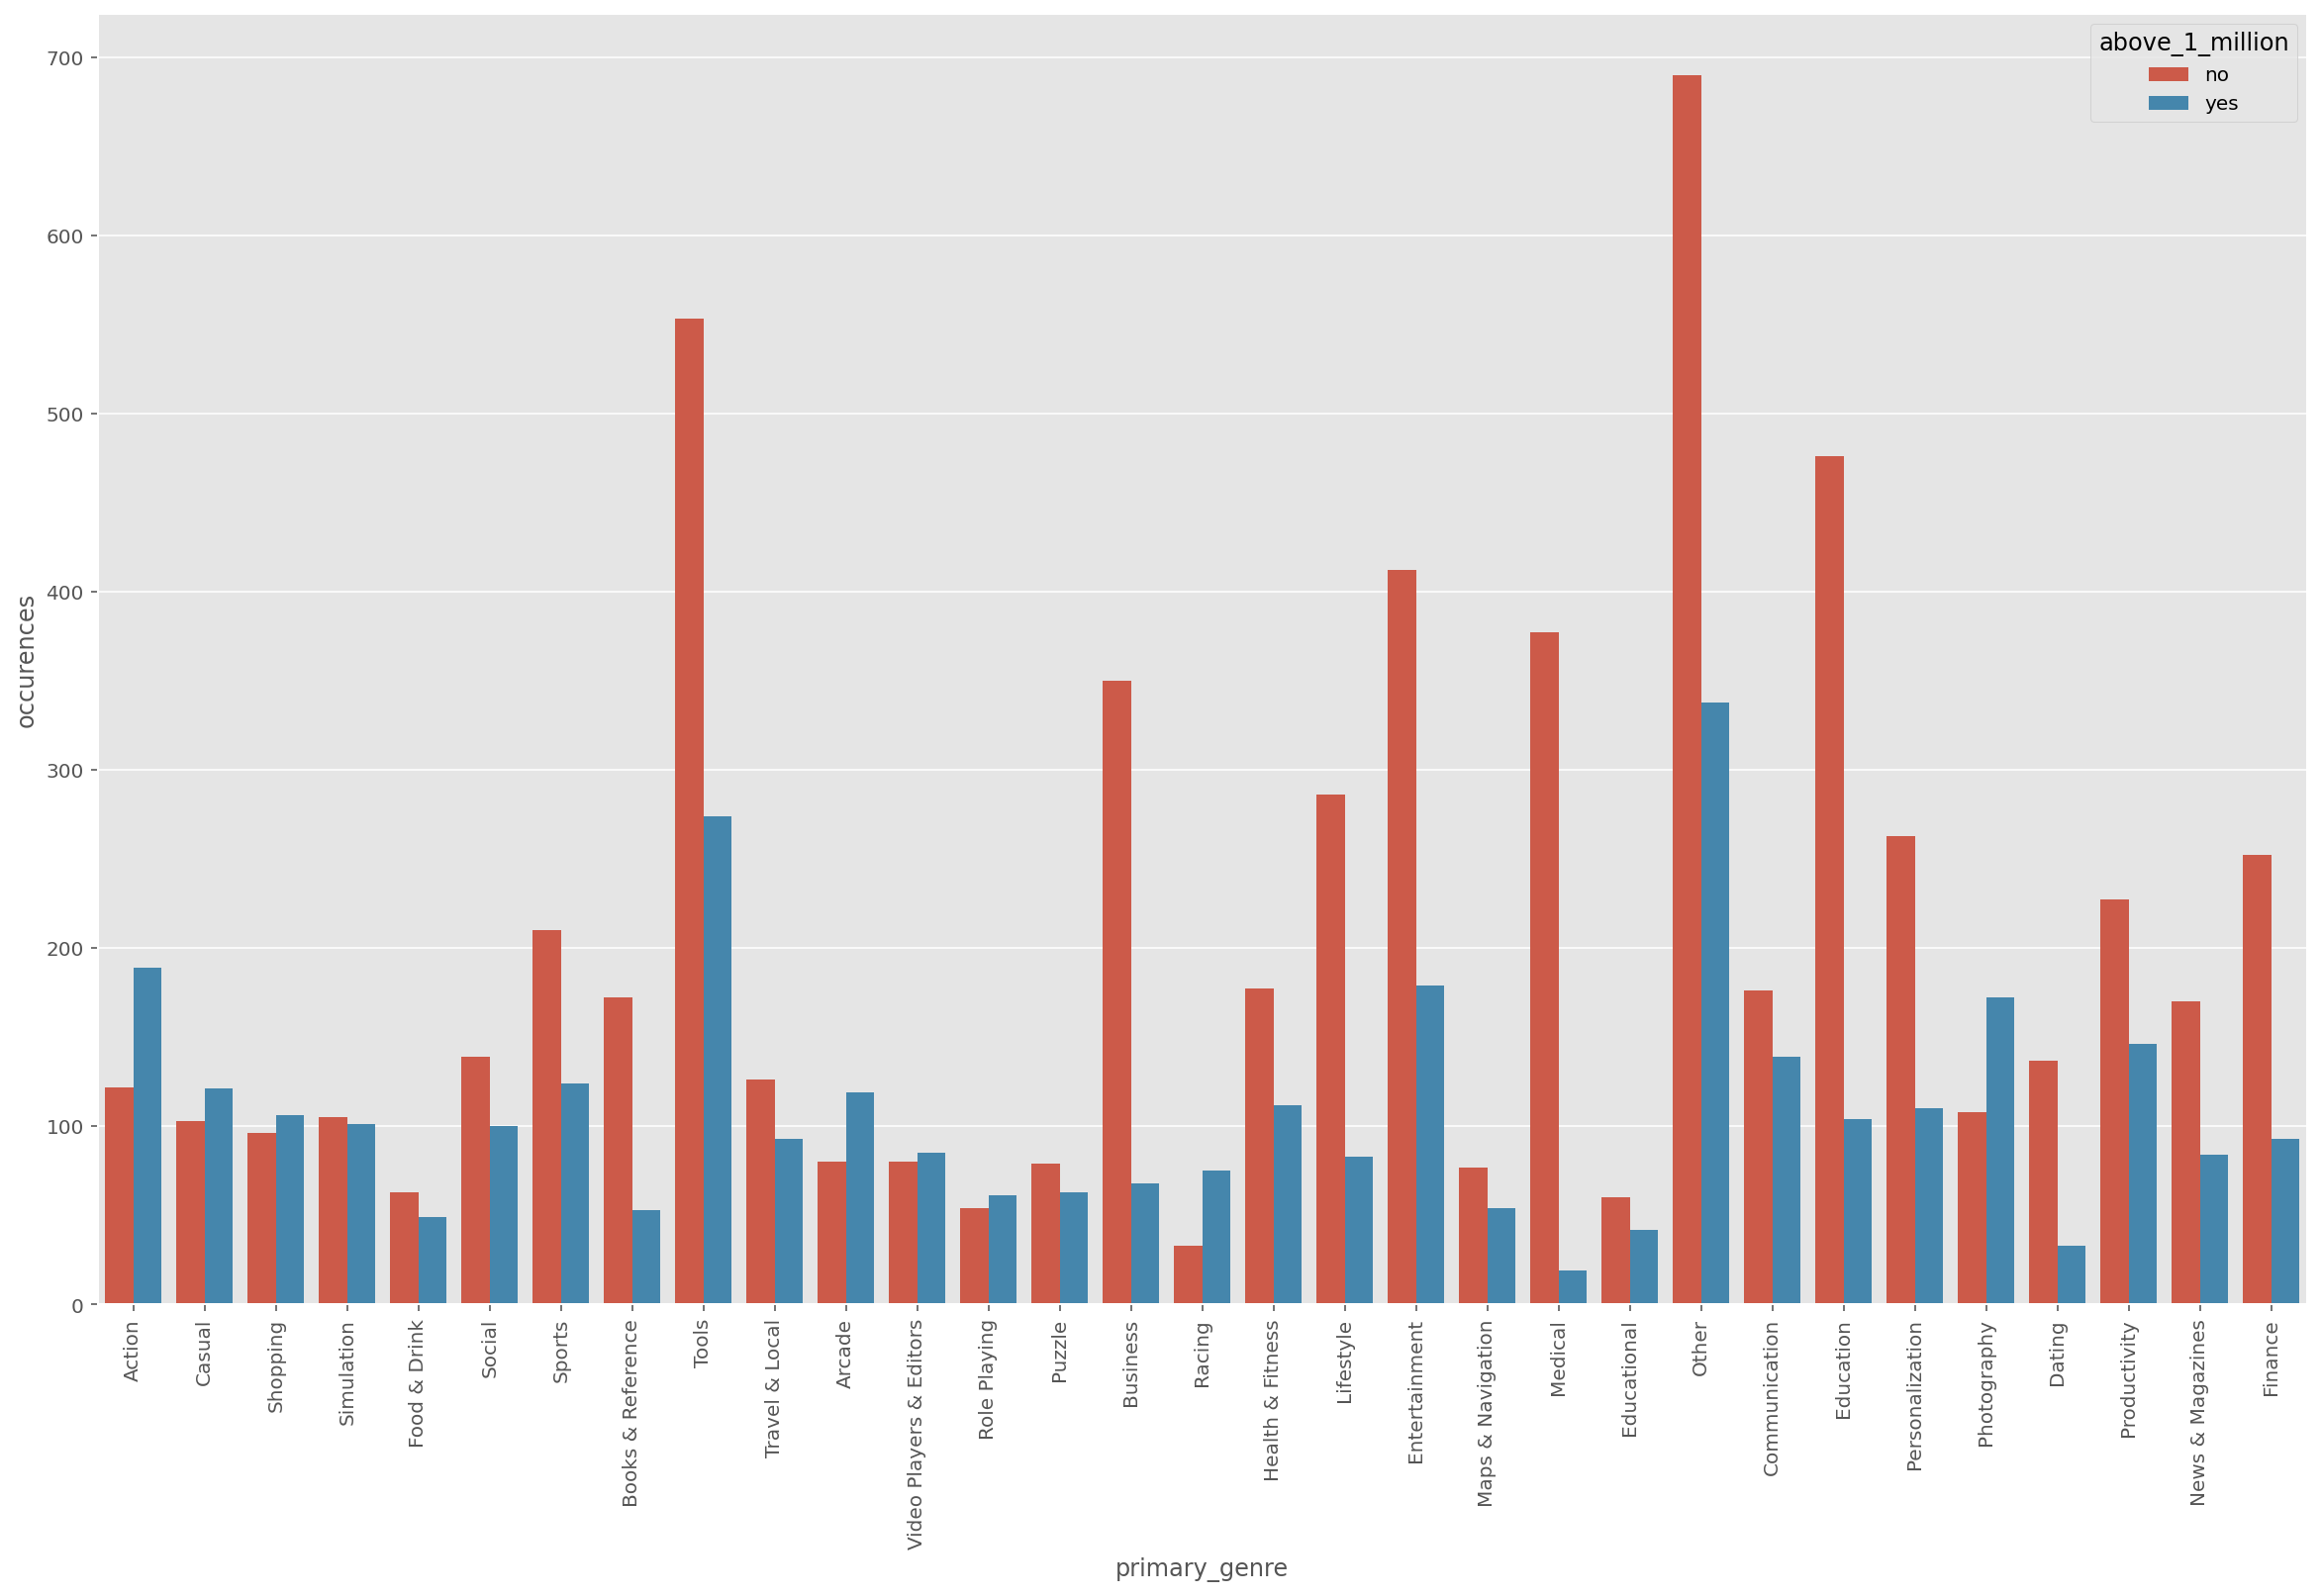

In [53]:
#primary_genre
plt.figure(figsize=(20,12))
dt = df.groupby(['primary_genre','above_1_million']).size().to_frame('occurences').reset_index().sort_values(by='above_1_million', ascending=False)
chart = sns.barplot(x='primary_genre', y='occurences', hue='above_1_million', data=dt.sort_values("above_1_million"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

For primary genre we see that most of the values correspond to apps that, in general, have more instances below 1 million than above. The only genre that seem to have more apps with above 1 million downloads is 'Action'.

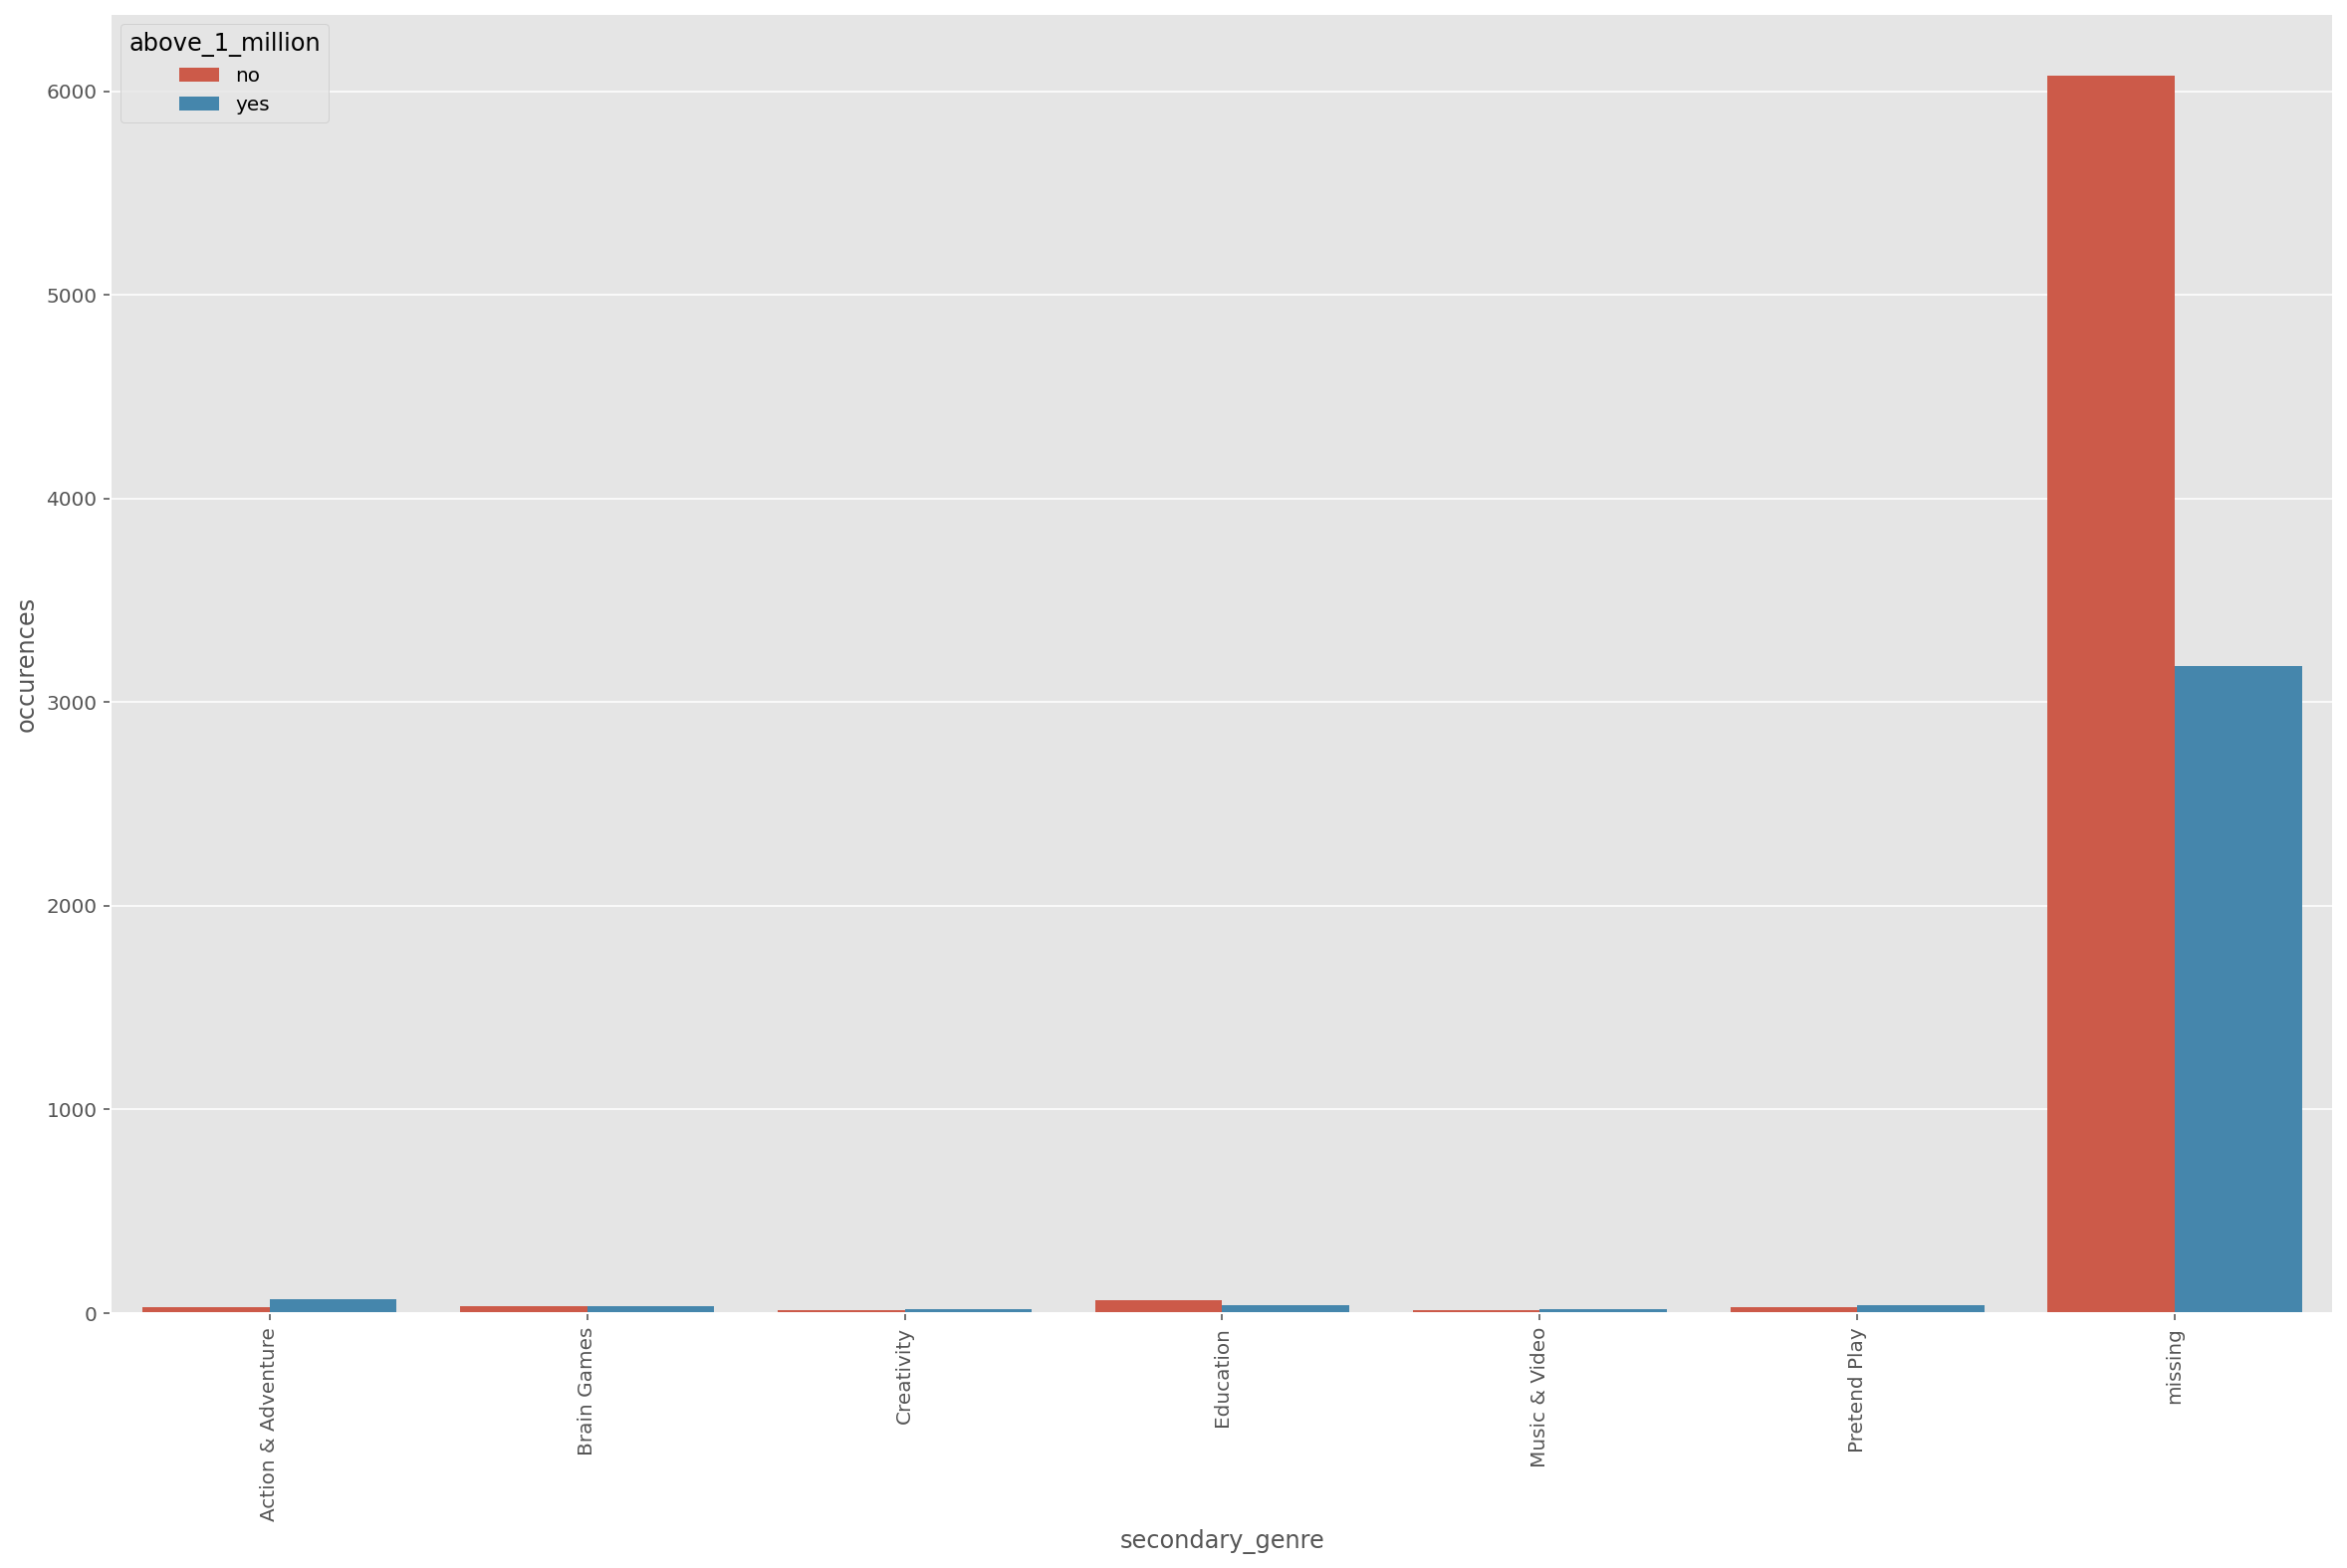

In [54]:
##### secondary_genre
plt.figure(figsize=(20,12))
dt = df.groupby(['secondary_genre','above_1_million']).size().to_frame('occurences').reset_index().sort_values(by='above_1_million', ascending=False)
chart = sns.barplot(x='secondary_genre', y='occurences', hue='above_1_million', data=dt.sort_values("above_1_million"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

As we saw in our data prep, many of the apps do not have a secondary genre, as we can confirm in the graph above. We can also see that when secondary genre is missing there is 2 times more apps that have 1 million or below installs than above 1 million.

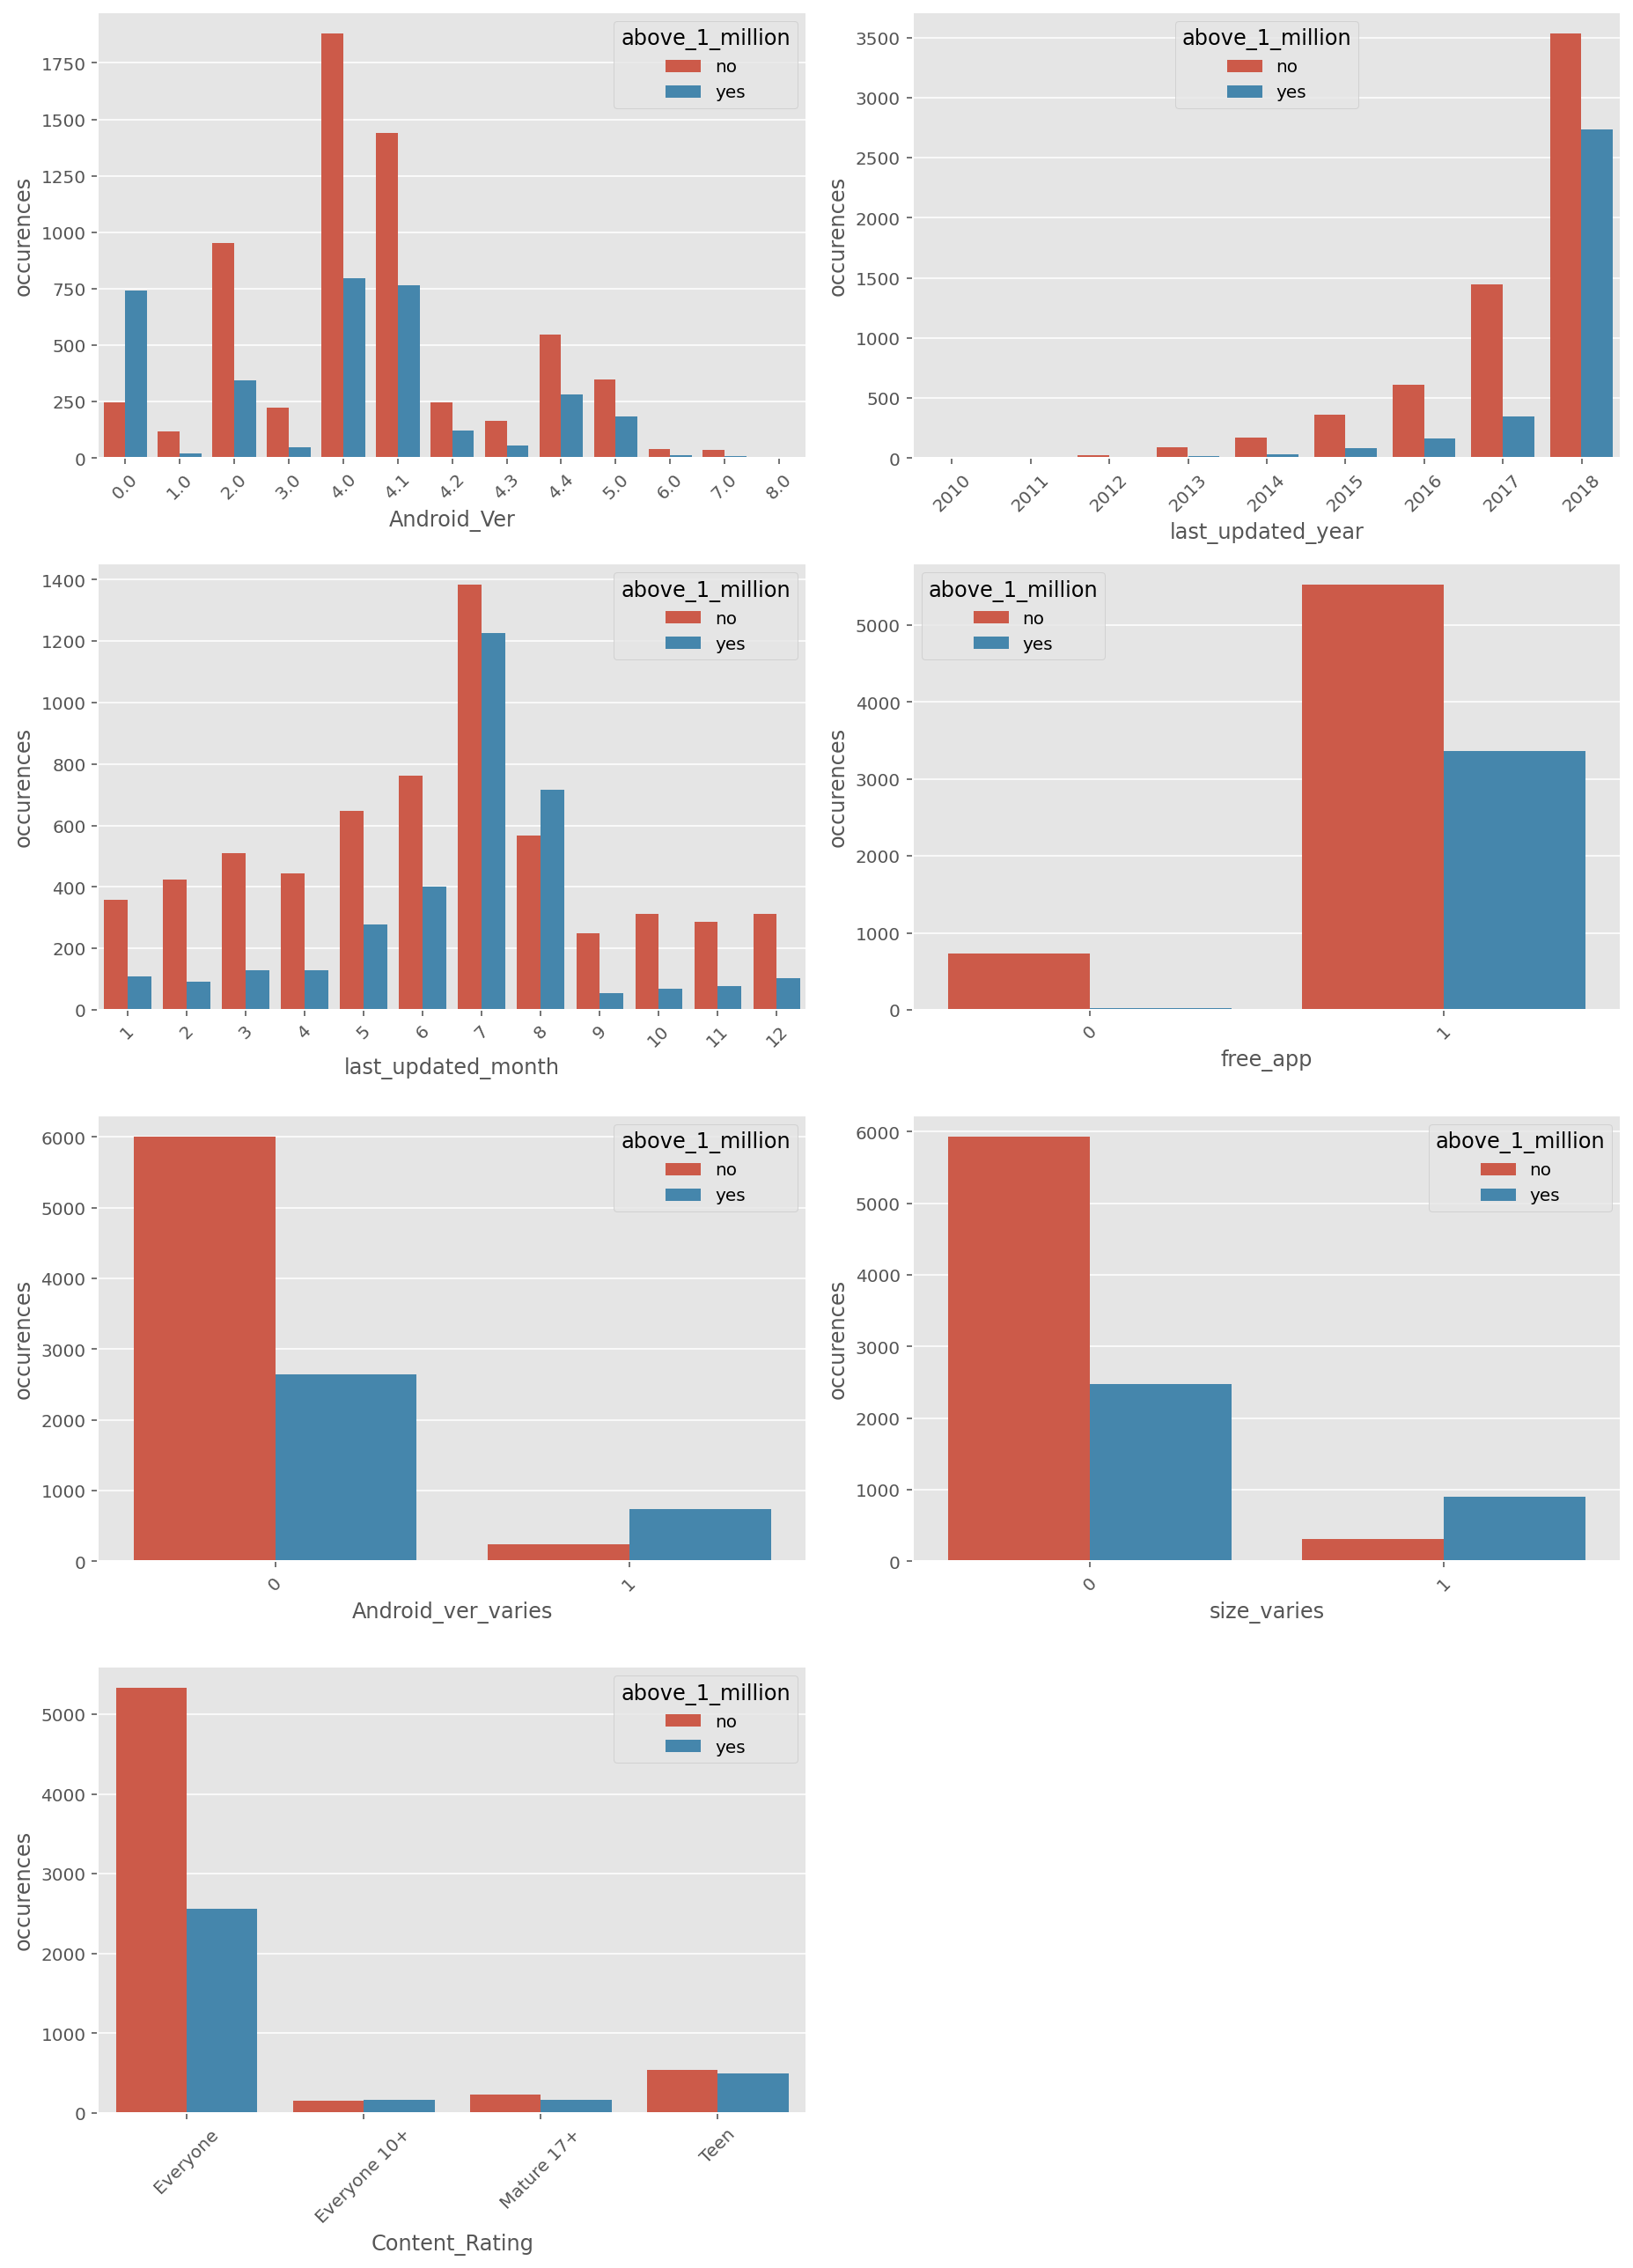

In [55]:
#categorical nominal
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(13,18))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in categoric_together: #for each numeric column in the dataframe        
    plt.subplot(4,2,j)
    dt = df.groupby([k,'above_1_million']).size().to_frame('occurences').reset_index().sort_values(by='above_1_million', ascending=False)
    chart = sns.barplot(x=k, y='occurences', hue='above_1_million', data=dt.sort_values("above_1_million"))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

From the graphs above we can see that 'free_app' looks like a promising predictor for our response, since almost all paid apps are not above 1 million downloads. When Android version and size varies there seems to be more prevalence of apps above 1 million (some examples of these ones are almost all social media apps).

### Numeric Features

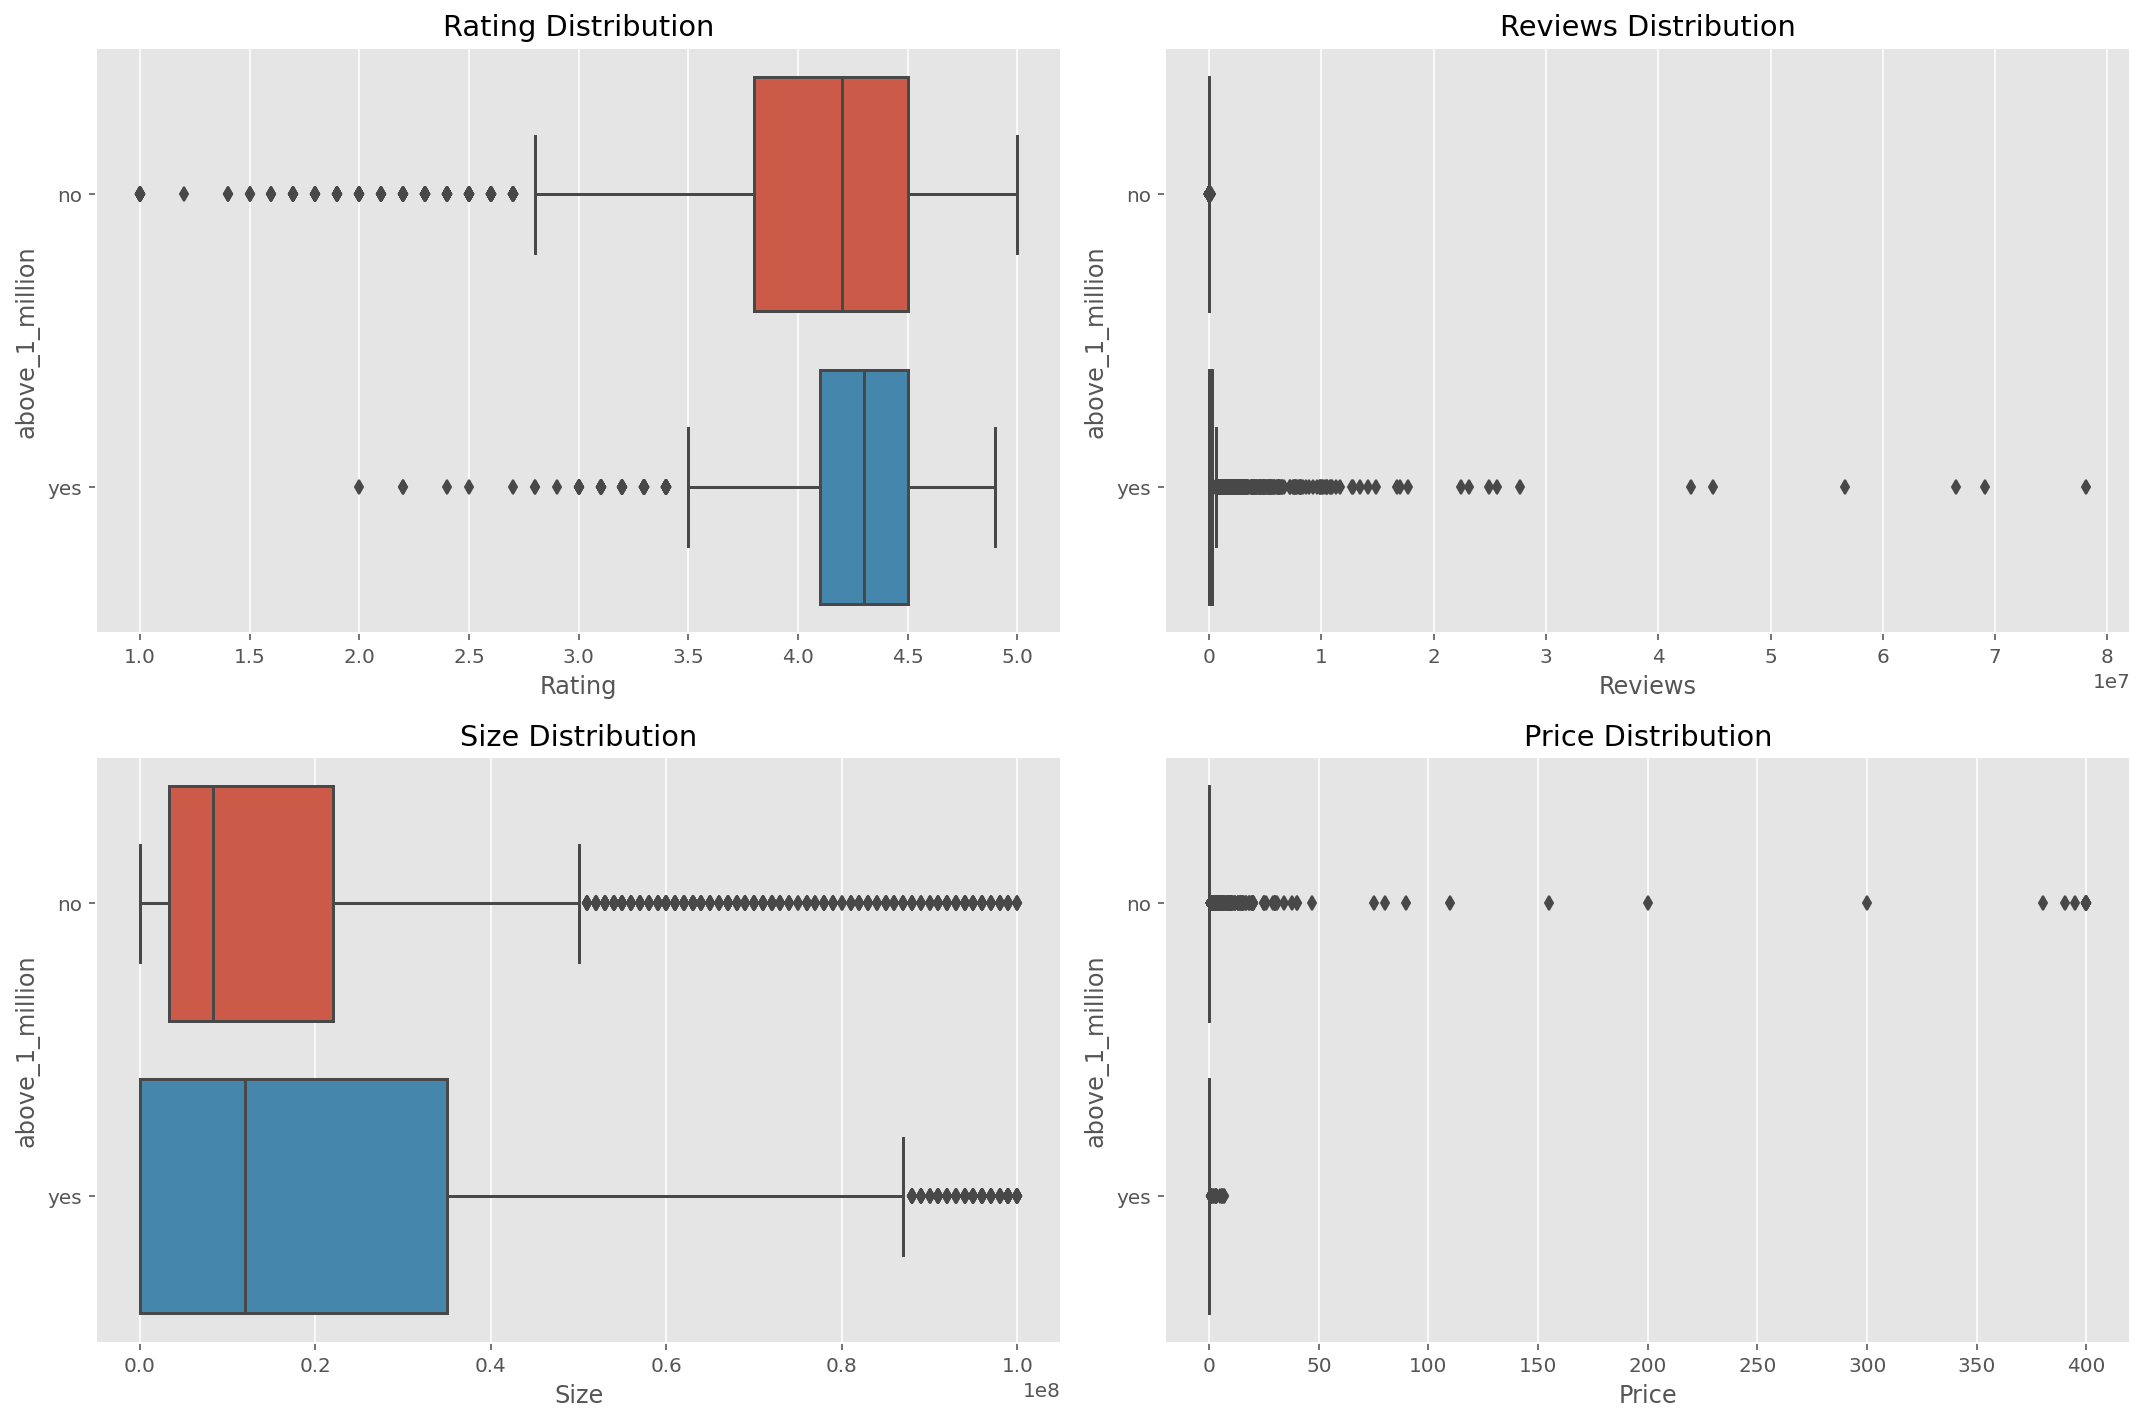

In [56]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,10))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in numeric: #for each numeric column in the dataframe        
    plt.subplot(2,2,j)
    sns.boxplot(x=k, y = "above_1_million", data = df.sort_values("above_1_million"))
    plt.title(k + " Distribution");
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

We can see that the 4 numeric attributes seems to be good predictors for our response. Apps that have above 1 million downloads tend to have in general, higher rating and number of reviews. For price is the opposite, as we could see before that apps that are free (or a few dollars) tend to me more likely to reach above 1 million installs.
We will standardize these attributes, as well as the categorical ordinal, to be able to have them on a similar scale for our machine learning models implementation.

From the size grouped by above_1_million figure, we can see that this variable could be a good predictor however, we are unsure to whether a large sized application provides a better chance of gaining above 1 million or not. This uncertainty it due to the conflict between our domain knowledge obtained from the experts at google (https://developer.android.com/topic/performance/reduce-apk-size) and our chart here. which means this needs further research. 

## Label Encoding

Considering we have a wide variety of categorical variables we will create n-1 dummy variables for each column.

In [57]:
# Getting the dummy variables.
df_dummies = pd.get_dummies(df, columns = dummies, drop_first=True)
df_dummies.columns = df_dummies.columns.str.replace(" ", "_")
df_dummies.columns = df_dummies.columns.str.replace("&", "and")

# Splitting into predictors and response.
# -------------------------------------
X = df_dummies.loc[:, df_dummies.columns != 'above_1_million'].copy()
y = df_dummies.loc[:, 'above_1_million'].copy()

old_x = df_dummies[df_dummies.Rating.notna()].loc[:, df_dummies.columns != 'above_1_million'].copy()
old_y = df_dummies[df_dummies.Rating.notna()].loc[:, 'above_1_million'].copy()

In [58]:
old_x.shape

(8183, 73)

We can see that we now have 75 columns. <br>
Next we will explore the possibility of imputing missing values for 'Rating' attribute.

## Missing values for Rating

To input the missing values for __Rating__ we will be using the KNN algorithm. Using the dataframe with the dummy columns we will apply __Standardization__ to allow numeric features be in the same scale before imputing the values. We will exclude the original response ('above_1_million') and the new response ('Rating'). <br>

We will apply the procedure to our dataframe using ColumnTransformer, and considering we only want to input to numeric features, we set the order of the columns at the beginning so that the rest of the columns get appended at the right of the numeric with the 'passthrough' parameter.

In [59]:
scaled_features = X.copy()

# Columns
standardize_columns = ['Reviews', 'Size', 'Price', 'Android_Ver', 'last_updated_year','last_updated_month', 'last_updated_day']

features = scaled_features[standardize_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[standardize_columns] = features


scaled_features.head(2)

,Rating,Reviews,Size,free_app,Price,Android_Ver,Android_ver_varies,last_updated_year,last_updated_month,last_updated_day,...,primary_genre_Sports,primary_genre_Tools,primary_genre_Travel_and_Local,primary_genre_Video_Players_and_Editors,secondary_genre_Brain_Games,secondary_genre_Creativity,secondary_genre_Education,secondary_genre_Music_and_Video,secondary_genre_Pretend_Play,secondary_genre_missing
0,4.1,-0.118283,0.054838,1,-0.065163,0.408099,0,0.575217,-2.016488,-0.914550,...,0,0,0,0,0,0,0,0,0,1
2,4.7,-0.070608,-0.424127,1,-0.065163,0.408099,0,0.575217,0.615158,-1.550264,...,0,0,0,0,0,0,0,0,0,1


In [60]:
scaled_features.isnull().sum()

Rating                             1459
Reviews                               0
Size                                  0
free_app                              0
Price                                 0
                                   ... 
secondary_genre_Creativity            0
secondary_genre_Education             0
secondary_genre_Music_and_Video       0
secondary_genre_Pretend_Play          0
secondary_genre_missing               0
Length: 73, dtype: int64

In [61]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")

#take the array results and transform into a dataframe
scaled_features = pd.DataFrame(imputer.fit_transform(scaled_features), columns=scaled_features.columns.tolist(), index = df_dummies.index)

#show results
scaled_features.head()

,Rating,Reviews,Size,free_app,Price,Android_Ver,Android_ver_varies,last_updated_year,last_updated_month,last_updated_day,...,primary_genre_Sports,primary_genre_Tools,primary_genre_Travel_and_Local,primary_genre_Video_Players_and_Editors,secondary_genre_Brain_Games,secondary_genre_Creativity,secondary_genre_Education,secondary_genre_Music_and_Video,secondary_genre_Pretend_Play,secondary_genre_missing
0,4.1,-0.118283,0.054838,1.0,-0.065163,0.408099,0.0,0.575217,-2.016488,-0.914550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.7,-0.070608,-0.424127,1.0,-0.065163,0.408099,0.0,0.575217,0.615158,-1.550264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.5,-0.000674,0.333846,1.0,-0.065163,0.545142,0.0,0.575217,-0.136741,-0.808598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.3,-0.117842,-0.698486,1.0,-0.065163,0.682184,0.0,0.575217,-0.136741,0.462830,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4.4,-0.118278,-0.568282,1.0,-0.065163,-0.962323,0.0,-0.304720,-1.264589,1.098544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
scaled_features.isnull().sum()

Rating                             0
Reviews                            0
Size                               0
free_app                           0
Price                              0
                                  ..
secondary_genre_Creativity         0
secondary_genre_Education          0
secondary_genre_Music_and_Video    0
secondary_genre_Pretend_Play       0
secondary_genre_missing            0
Length: 73, dtype: int64

Now that our Rating column is free of null values, we will compare the probability density function to make sure that the imputation was consistent with the feature distribution.

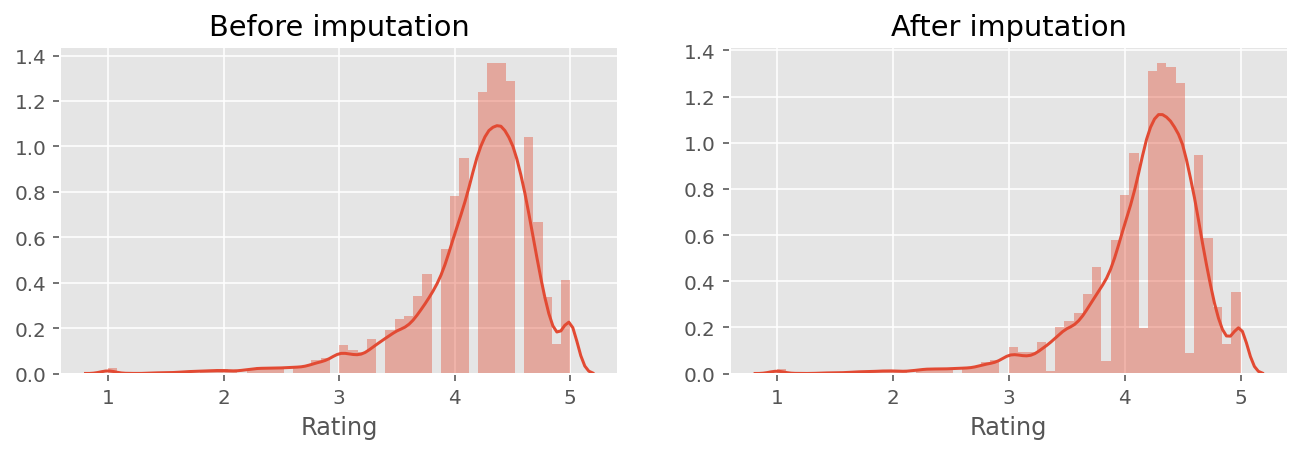

In [63]:
#checking distribution before and after
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(df[df["Rating"].notna()]['Rating']);
plt.title("Before imputation");

plt.subplot(1, 2, 2)
sns.distplot(scaled_features["Rating"]);
plt.title("After imputation");

We see that the PDF before and after look extremely similar. <br>
Now we Standardize the column Rating, get back our original response variable ('above_1_million') and split the data into predictors and response.

In [64]:
full = scaled_features.copy()

# Columns
standardize_columns = ['Rating']

features = full[standardize_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
full[standardize_columns] = features

full.head(2)

,Rating,Reviews,Size,free_app,Price,Android_Ver,Android_ver_varies,last_updated_year,last_updated_month,last_updated_day,...,primary_genre_Sports,primary_genre_Tools,primary_genre_Travel_and_Local,primary_genre_Video_Players_and_Editors,secondary_genre_Brain_Games,secondary_genre_Creativity,secondary_genre_Education,secondary_genre_Music_and_Video,secondary_genre_Pretend_Play,secondary_genre_missing
0,-0.135488,-0.118283,0.054838,1.0,-0.065163,0.408099,0.0,0.575217,-2.016488,-0.914550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.039312,-0.070608,-0.424127,1.0,-0.065163,0.408099,0.0,0.575217,0.615158,-1.550264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
full['above_1_million'] = df_dummies['above_1_million']

# Splitting into predictors and response.
# -------------------------------------
X = full.loc[:, full.columns != 'above_1_million']
y = full.loc[:, 'above_1_million']

Let's see the relationship between the numeric attributes that were standardized and the response.

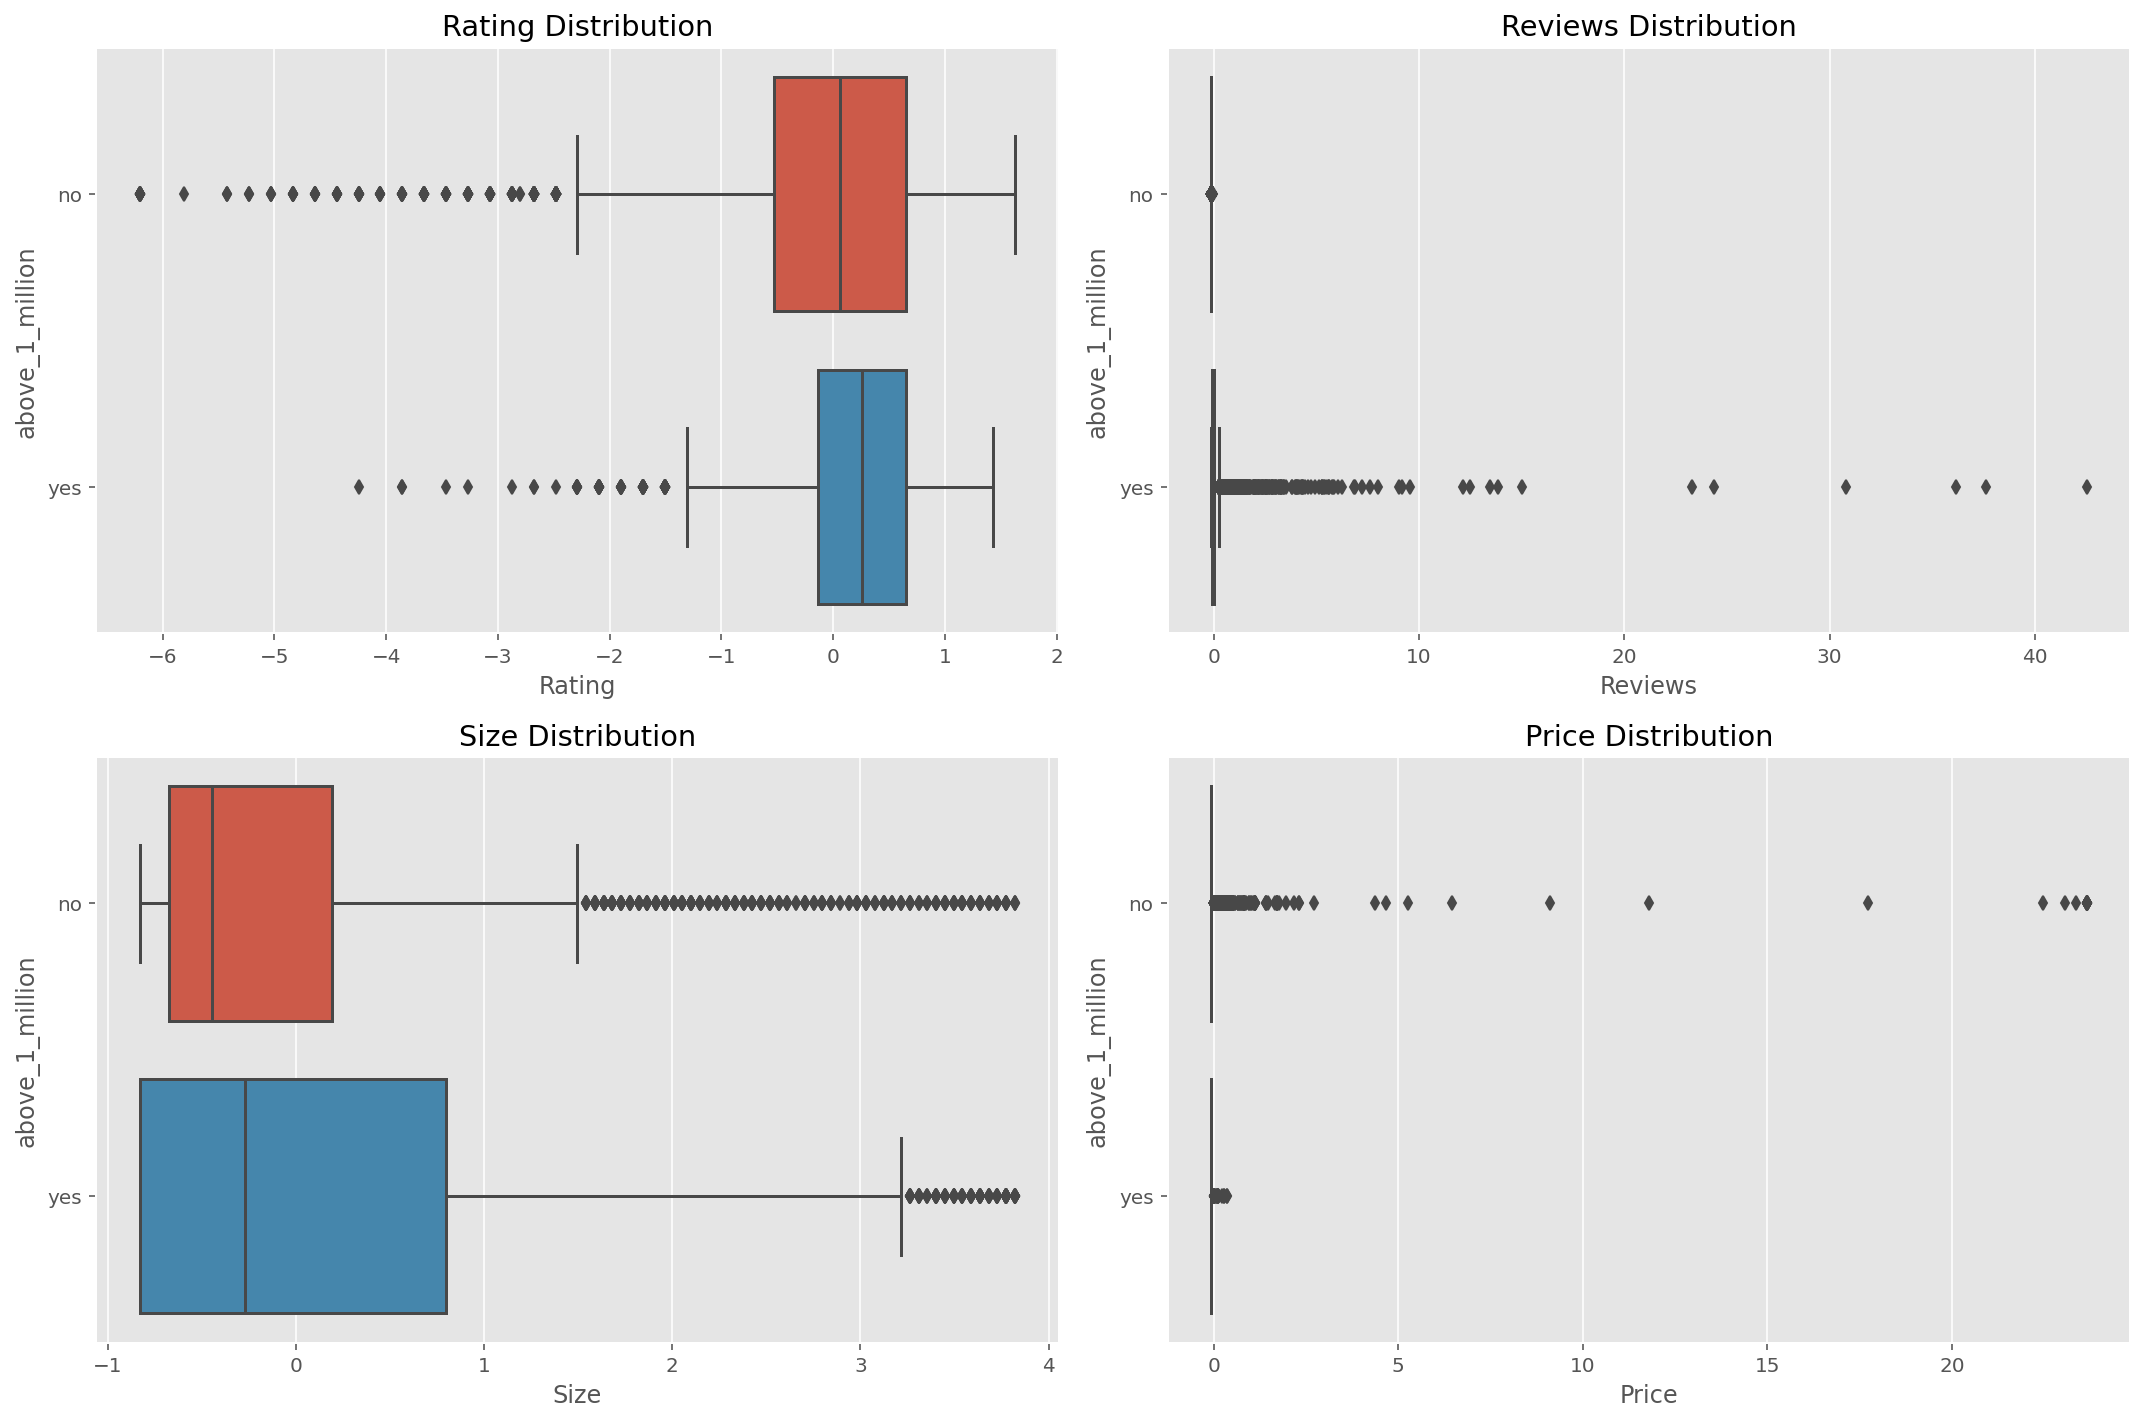

In [66]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,10))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in numeric: #for each numeric column in the dataframe        
    plt.subplot(2,2,j)
    sns.boxplot(x=k, y = "above_1_million", data = full.sort_values("above_1_million"))
    plt.title(k + " Distribution");
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

After standardization we can see that the numeric attributes are still good predictors for our response, and are now in similar scale.

## Feature selection

Here we use feature selection methods to choose the potentially top predictive features.

#### Chi-Squared

- In this section we use Chi-squared to make an educated decision on which are the most appropriate features to choose for our machine learning models to predict our response. 

- In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. This is according to the sklearn documentation.
http://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [67]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# find best scored 5 features
select_feature = SelectKBest(chi2).fit(old_x,old_y)

# Created a dictionary.
dic = {}
dic_scores = {}
dic_pvalue = {}
for score, name in zip(select_feature.scores_,old_x.columns):
    dic[name] = score
    dic_scores[name] = score
    
for score, name in zip(select_feature.pvalues_,old_x.columns):
    dic_pvalue[name] = score
    
# Sorting the dictionary.
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

first20 = {k: dic[k] for k in list(dic)[:18]}
first20

{'Size': 3737578682.5675592,
 'Reviews': 2914851089.2847624,
 'Price': 5784.953679651973,
 'size_varies': 627.191281570736,
 'Android_ver_varies': 529.0610676319296,
 'Android_Ver': 179.74119406579473,
 'Category_MEDICAL': 145.7858325418768,
 'primary_genre_Medical': 145.7858325418768,
 'Category_GAME': 114.38514473483053,
 'primary_genre_Education': 86.3318116083401,
 'last_updated_month': 72.6418069980255,
 'Content_Rating_Teen': 64.56463750553719,
 'Category_PHOTOGRAPHY': 63.55474548774028,
 'primary_genre_Photography': 63.55474548774028,
 'primary_genre_Racing': 41.9289774652548,
 'primary_genre_Arcade': 39.11936505339977,
 'last_updated_day': 32.18134171542497,
 'free_app': 27.9558254908073}

#### Recursive feature elimination (RFE) with random forest

RFE uses a classification method (i.e random forest), to assign weights to each of features. The attributes whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned data set until we get the desired number of features.

The reason we chose random forest is because it is a tree based algorithm so we won't have to worry about treating the categorical variables and the numerical variables differently and we can simply feed all of them into our random forest classifier. Another reason we chose random forest is that it has been proven empirically by researchers to provide good results for both linear and nonlinear relationships between predictors. However, the presence of highly correlated predictors has been shown to negatively impact its ability to identify strong predictors which is why we manually removed highly collinear variables earlier in the study. [5]

In [68]:
# set the RF classifier and get the top 4 predictive features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf_clf = RandomForestClassifier(n_jobs = -1)      
rfe = RFE(estimator=rf_clf, n_features_to_select = 5, step = 1)

rfe = rfe.fit(X, y)
print('Chosen best 5 features by rfe:',X.columns[rfe.support_])

Chosen best 5 features by rfe: Index(['Rating', 'Reviews', 'Size', 'Android_Ver', 'last_updated_day'], dtype='object')


## Our predictors

- The RFE and Chi-squared selection methods both seem to consider `Size` and `Reviews` as good predictors and therefore we should use include them in our predictors set. 

- `Rating` has been shortlisted earlier as a potentially good predictor in our EDA phase, and now we see that the RFE also considers it to be one and therefore we will include it in our selection set.

- `Price` has been shortlisted earlier as a potentially good predictor in our EDA phase and now we see that the Chi-squared also considers it to be one and therefore we will include it in our selection set.

In summary we are going to be using four predictors `Size`, `Reviews`, `Price` and `Rating` to help predict our response variable,

In [69]:
predictors = ['Size', 'Reviews','Price', 'Rating']

#### Response variable revisited

Some machine learning models require that the predictors as well as our response variable is in numerical format. Given that we will use such models (KNNs and SVMs...etc.). It is imperative to encode the response variable from `yes` and `no` to `1` and `0`.

In [70]:
y.unique()

array(['no', 'yes'], dtype=object)

In [71]:
y = y.apply(lambda x: x.replace('no','0'))
y = y.apply(lambda x: x.replace('yes','1'))
y = pd.to_numeric(y)
y.unique()

array([0, 1], dtype=int64)

# Machine Learning Models

As a general approach, for all the models we will have lists to store the metrics for both the training and testing set, and we will use gridsearch to select the best hyperparameters based on our analysis for each one. We will use the lists with the corresponding metrics in the model selection section.

To start we split the data into training and testing sets, using “stratify” as one of the parameters to ensure that all response classification labels are proportionally represented in our training and testing subsets.

In [72]:
#model 1 with the first 3 features
X = X[predictors].copy()

#creating train and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [73]:
# Metrics for training set
accuracy_list = []
recall_list = []
auc_list = []
f1_list = []
precision_list = []

# Metrics for testing set
recall_testing = []
f1_testing = []
precision_testing = []
acc_testing = []

Next we are going to create three models: KNN, SVM and a Random Forest.

## KNN

- To apply KNN we need to Select the best value for 'k' for the optimal number of neighbors and 'd' for the distance metric, so we can create the training and testing set and conduct cross-validation on the training set, for a variety of different values of 'k' and 'd', searching for the combination that gives the best performance on the training data.[9]

- Given that the KNN model uses a dataset that has an imbalanced distribution in the response variable and therefore we will use scoring = 'f1' for cross-validation to identify the potentially good models.[4]

In [74]:
def cross_validate_knn(X,y, metric_param):
    """Function that chooses the best k (between 1 and 31)
    for a given training set and metric parameter"""

    k_range = range(2, 31)
    k_scores = []
    # use iteration to calculate  different k in models, then return the average accuracy based on the cross validation
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=5, scoring=metric_param)
        k_scores.append(scores.mean())
        
    # plot to see clearly
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated ' + metric_param + ' Score')
    plt.show()

    #perform gridsearch to get highest score
    knn2 = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
    
    param_grid = {'n_neighbors': np.arange(2, 31), 'p': np.arange(1, 3)}#use gridsearch to test all values for n_neighbors
    
    knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring = metric_param)#fit model to data
    knn_gscv.fit(X, y)
    

    #check top performing n_neighbors value
    print('top performing n_neighbors value ',knn_gscv.best_params_)
    #check mean score for the top performing value of n_neighbors
    print('top performing n_neighbors score ',knn_gscv.best_score_)
    
    return (knn_gscv.best_params_)

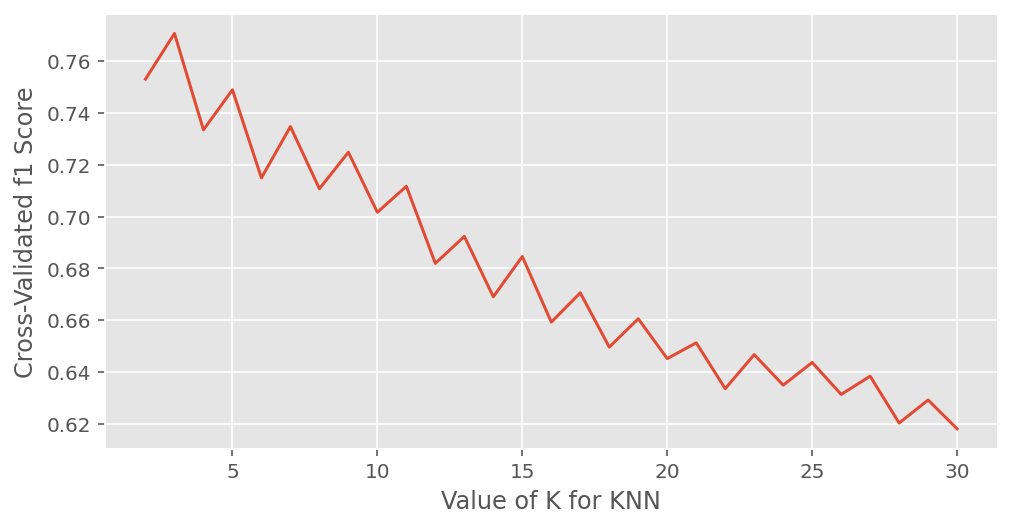

top performing n_neighbors value  {'n_neighbors': 3, 'p': 2}
top performing n_neighbors score  0.7705797489896418


In [75]:
best_params = cross_validate_knn(X_train, y_train, 'f1')
best_k = best_params['n_neighbors']
best_distance = best_params['p']

In [76]:
# fit the model with best hyperparameters
knn = KNeighborsClassifier(n_neighbors = best_k, p = best_distance)
knn.fit(X_train,y_train)

# cross-validation on training set
accuracy_list.append(cross_val_score(knn, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(knn, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(knn, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(knn, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(knn, X_train, y_train, scoring = "precision", cv = 5).mean())

In [77]:
# make predictions and store metrics
y_pred = knn.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test,y_pred)))
recall_testing.append(np.mean(metrics.recall_score(y_test,y_pred)))
f1_testing.append(np.mean(metrics.f1_score(y_test,y_pred)))
acc_testing.append(metrics.accuracy_score(y_test,y_pred))

## SVM
Since we are going to perform a classification task, we will use the support vector classifier class[8], which is written as SVC in the Scikit-Learn's svm library starting with linear models and then applying kernels to transform the data to a higher dimension:

- Standarization: as described in sklearn documentation this is a common requirement for many machine learning estimators, as they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

- kernel: Apply kernels to transform the data to a higher dimension.

- degree: Degree is a parameter used when kernel is set to ‘poly’. It’s the degree of the polynomial used to find the hyperplane to split the data. In this case we will try 2 values: 2 and 3.

- Regularization parameters:
    - C: regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. Large value of 'c' means you will get more intricate decision curves trying to fit in all the points. Figuring out how much you want to have a smooth decision boundary vs one that gets things correct is part of artistry of machine learning. So try different values of c for your dataset to get the perfectly balanced curve and avoid over fitting.
    For our first parameter C: so we choose to values incrementally. First we start with one small and the other large to understand whether or not it works best with smaller values or larger values. When C=1: the SVM boundaries will be wider allowing a large amount of margin violations but will probably generalize better. Whereas, when C=10 the model results in a narrower boundary.

    - gamma:
    “Increasing gamma makes the bell-shaped curve narrower. As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother.” That's why it is essential to choose the appropriate value for gamma. In this assignment we choose 2 values: 1 and 0.1.

#### Using GridSearch for Kernels and Regularization Parameters
#### Linear + Non-linear (grid search)
Since there are a great deal of parameters involved in the creation of a support vector machine, we are going to be using grid search to look for the best possible combination of parameters from the parameter pool that we suspect to have a positive effect on our SVM model.

In [78]:
#perform gridsearch to get highest score
param_grid = {'C': [1, 10, 15], 'degree':[2,3], 'gamma': [1,0.1], 'kernel': ['rbf', 'poly', 'sigmoid','linear']} #use gridsearch to test all values for n_neighbors
svc_grid = GridSearchCV(SVC(), param_grid, scoring = 'f1', verbose=10, n_jobs=-1) # Fit model to data

In [79]:
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 15], 'degree': [2, 3], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='f1', verbose=10)

In [80]:
print(svc_grid.best_params_)

{'C': 15, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}


In [81]:
print(svc_grid.best_score_)

0.8653036788874646


In [82]:
# Fit SVM model with best hyperparameters
svm = make_pipeline(PolynomialFeatures(degree=2),
                             SVC(kernel = 'linear', C=15, gamma=1))
svm.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('svc', SVC(C=15, gamma=1, kernel='linear'))])

In [83]:
# cross-validation on training set
accuracy_list.append(cross_val_score(svm, X_train, y_train, scoring = "accuracy", cv = 5).mean())
recall_list.append(cross_val_score(svm, X_train, y_train, scoring = "recall", cv = 5).mean())
auc_list.append(cross_val_score(svm, X_train, y_train, scoring = "roc_auc", cv = 5).mean())
f1_list.append(cross_val_score(svm, X_train, y_train, scoring = "f1", cv = 5).mean())
precision_list.append(cross_val_score(svm, X_train, y_train, scoring = "precision", cv = 5).mean())

In [84]:
# make predictions and store metrics
y_pred = svm.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test,y_pred)))
recall_testing.append(np.mean(metrics.recall_score(y_test,y_pred)))
f1_testing.append(np.mean(metrics.f1_score(y_test,y_pred)))
acc_testing.append(metrics.accuracy_score(y_test,y_pred))

## Random Forests

In this section we create a Random Forest algorithm[7]. We will use the default sklearn parameters for:

- n_estimators: the number of trees in the forest, we keep the default, which is 100.

- max_depth: The maximum depth of the tree. To avoid that the nodes get expanded until all leaves are pure we specify a range between 5 and 10.

- class_weight: Since we have an imbalance multiclass response, we want to be able to provide appropriate weights to each of them. To do this we define this parameter to "balanced" to automatically adjust weights inversely proportional to class frequencies in the input data.

Because we are not worried very worried about time complexity, we are merely looking to create a "good" classifier.

In [85]:
#defining the scorer
f1_scorer = metrics.make_scorer(metrics.f1_score)
parameters = {'max_depth':np.arange(5,10),'class_weight':['balanced','none']}

In [86]:
# perform grid search to find best hyperparameters
random_f = RandomForestClassifier()
grid = GridSearchCV(random_f, parameters, scoring = f1_scorer, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
model_params = grid.best_params_
grid.best_params_

{'class_weight': 'balanced', 'max_depth': 6}

In [ ]:
# Random forest with my favourite state, state 42
rfc = RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 6)
rfc.fit(X_train, y_train)

In [88]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = 'recall', cv = 5)))
f1_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = 'f1', cv = 5)))
precision_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = 'precision', cv = 5)))
accuracy_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = 'accuracy', cv = 5)))
auc_list.append(np.mean(cross_val_score(rfc, X_train, y_train, scoring = "roc_auc", cv = 5)))

In [89]:
# on the testing set and store results
y_pred = rfc.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred)))
acc_testing.append(np.mean(metrics.accuracy_score(y_test,y_pred)))

# Evaluation
Creating a data frame that illustrates the different metrics for each model.

In [90]:
print("\t \t The Model Metric Matrix for the training set")
# Cross validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['KNN Model', 'SVM Model', 'Random Forest Model ']
metrics_summary['Recall'] = recall_list
metrics_summary['Accuracy'] = accuracy_list
metrics_summary['Precision'] = precision_list
metrics_summary['AUC'] = auc_list
metrics_summary['F1_score'] = f1_list
metrics_summary1 = metrics_summary.copy()
metrics_summary1

	 	 The Model Metric Matrix for the training set


,Model #,Recall,Accuracy,Precision,AUC,F1_score
0,KNN Model,0.705642,0.852328,0.848847,0.878926,0.770580
1,SVM Model,0.774996,0.915079,0.979104,0.987623,0.865123
2,Random Forest Model,0.947624,0.950992,0.915865,0.990053,0.931472


In [91]:
print("\t \t The Model Metric Matrix for testing")
# test validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['KNN Model', 'SVM Model','Random Forest Model']
metrics_summary['Recall'] = recall_testing
metrics_summary['Accuracy'] = acc_testing
metrics_summary['Precision'] = precision_testing
#metrics_summary['AUC'] = auc_list
metrics_summary['F1_score'] = f1_testing
metrics_summary2 = metrics_summary.copy()
metrics_summary2

	 	 The Model Metric Matrix for testing


,Model #,Recall,Accuracy,Precision,F1_score
0,KNN Model,0.725664,0.864178,0.866197,0.789727
1,SVM Model,0.778761,0.918611,0.986916,0.870569
2,Random Forest Model,0.949853,0.954381,0.922636,0.936047


# Model Selection

- Since the data is imblanaced in regards to the response variable we would provide preferential treatement for the models with higher F1 scores, Precision and recall scores.

- All the models seem to be fairly consistent in terms of the evaluation metrics for both the training set and testing set.

- `KNN`: By looking at the model metric matrix , It is evidently clear that the K-nearest neighbor model is performing poorly in comparison to all the other models present. Therefore we are going to eleminate it from our model selection pool.  

- `SVM`: The SVM model is performing much better than the `KNN`, with its F1 score being higher. However this model is not without fault because the `precision` is extremely high, while the `recall` is very low, which has the making of a potentially misleading model. In addition to that it's `F1` Score is lower than the one from `Random forest`. 

- `Random Forest`: Random forest provides exceptional scores across all the metrics and not just one particular metric, so while it is indeed lower than an `SVM` in terms of precision it is a more reliable model as all the other scores including the `F1` score are better than that of the `SVM`.

In conclusion, amongst the three machine learning models mentioned we are going to choose the Random Forest as it is a balanced, high performing model in all aspects.

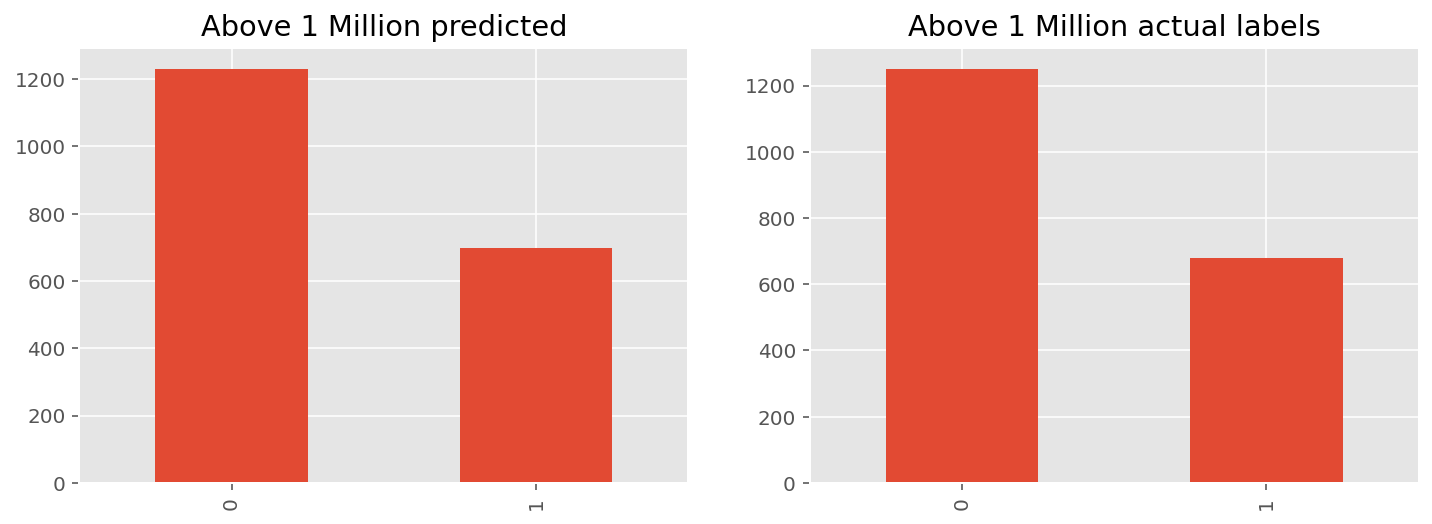

In [92]:
y_pred = rfc.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['above_1_million'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred.above_1_million.value_counts().plot(kind='bar');
plt.title('Above 1 Million predicted')
plt.subplot(1,2,2)

y_test.to_frame().above_1_million.value_counts().plot(kind='bar');
plt.title('Above 1 Million actual labels')
plt.show();

The chart above demonstrates the predictions of the random forest on the testing set incomparison to the actual values and as you can see it is extremely similar. This comes as no surprise as the model is quiet efficient.

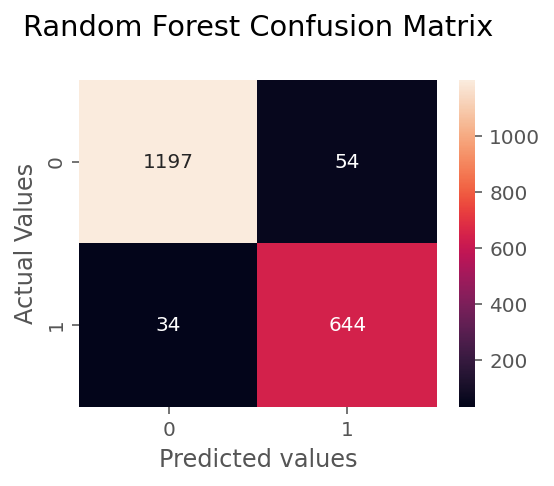

In [93]:
##### Confusion Matrix for Model 3 ####
plt.figure(figsize=(4, 3))
cm_2 = confusion_matrix(y_test.to_frame(), y_pred)
sns.heatmap(cm_2,annot=True,fmt="d")
plt.title("Random Forest Confusion Matrix\n")
plt.ylabel('Actual Values')
plt.xlabel('Predicted values')
plt.show();

We show in the confusion matrix that our selected model is able to classify sucessfully the majority of the observations in the testing set. However there are 88 instances that were missclassified.

# Stacking

Stacking is a technique that allow us to take our classification models and use their output as the input for the meta-classifier. We use our base learners: KNN, SVM and Random forest and a Logistic Regression as our meta learner.

Note: That the models used here are the three models from the last section.

<img src="finalprojectstuff.PNG"/>

First we will create the ensemble model, then we fit the training data and use a similar approach as before, where we store the corresponding metrics through cross-validation.

In [94]:
# define the 3 models as estimators for Stacking
estimators = [('rfc', rfc),('svm', svm),('knn', knn)]

In [95]:
# train ensemble model
ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
ensemble.fit(X_train, y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=7,
                                                       random_state=42)),
                               ('svm',
                                Pipeline(steps=[('polynomialfeatures',
                                                 PolynomialFeatures()),
                                                ('svc',
                                                 SVC(C=15, gamma=1,
                                                     kernel='linear'))])),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression())

In [96]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'recall', cv = 5)))
f1_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'f1', cv = 5)))
precision_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'precision', cv = 5)))
accuracy_list.append(np.mean(cross_val_score(ensemble,  X_train, y_train, scoring = 'accuracy', cv = 5)))
auc_list.append(np.mean(cross_val_score(ensemble, X_train, y_train, scoring = "roc_auc", cv = 5)))

In [97]:
print("\t \t The Model Metric Matrix for the training set")
# Cross validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['KNN Model', 'SVM Model', 'Random Forest Model ','Ensemble']
metrics_summary['Recall'] = recall_list
metrics_summary['Accuracy'] = accuracy_list
metrics_summary['Precision'] = precision_list
metrics_summary['AUC'] = auc_list
metrics_summary['F1_score'] = f1_list
metrics_summary1 = metrics_summary.copy()
metrics_summary1

	 	 The Model Metric Matrix for the training set


,Model #,Recall,Accuracy,Precision,AUC,F1_score
0,KNN Model,0.705642,0.852328,0.848847,0.878926,0.770580
1,SVM Model,0.774996,0.915079,0.979104,0.987623,0.865123
2,Random Forest Model,0.947624,0.950992,0.915865,0.990053,0.931472
3,Ensemble,0.933607,0.952677,0.931907,0.989165,0.932750


In [98]:
print("\t \t The Model Metric Matrix for the training set")
# Cross validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['KNN Model', 'SVM Model', 'Random Forest Model ','Ensemble']
metrics_summary['Recall'] = recall_list
metrics_summary['Accuracy'] = accuracy_list
metrics_summary['Precision'] = precision_list
metrics_summary['AUC'] = auc_list
metrics_summary['F1_score'] = f1_list
metrics_summary1 = metrics_summary.copy()
metrics_summary1

	 	 The Model Metric Matrix for the training set


,Model #,Recall,Accuracy,Precision,AUC,F1_score
0,KNN Model,0.705642,0.852328,0.848847,0.878926,0.770580
1,SVM Model,0.774996,0.915079,0.979104,0.987623,0.865123
2,Random Forest Model,0.947624,0.950992,0.915865,0.990053,0.931472
3,Ensemble,0.933607,0.952677,0.931907,0.989165,0.932750


In [99]:
y_pred = ensemble.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred)))
acc_testing.append(np.mean(metrics.accuracy_score(y_test,y_pred)))

In [100]:
print("\t \t The Model Metric Matrix for the testing set")
# Cross validation.
metrics_summary = pd.DataFrame()
metrics_summary['Model #'] = ['KNN Model', 'SVM Model', 'Random Forest Model ','Ensemble']
metrics_summary['Recall'] = recall_testing
metrics_summary['Accuracy'] = acc_testing
metrics_summary['Precision'] = precision_testing
metrics_summary['F1_score'] = f1_testing
metrics_summary2 = metrics_summary.copy()
metrics_summary2

	 	 The Model Metric Matrix for the testing set


,Model #,Recall,Accuracy,Precision,F1_score
0,KNN Model,0.725664,0.864178,0.866197,0.789727
1,SVM Model,0.778761,0.918611,0.986916,0.870569
2,Random Forest Model,0.949853,0.954381,0.922636,0.936047
3,Ensemble,0.939528,0.956973,0.938144,0.938836


The metrics obtained from the training and the testing are consistent with each other.

## Ensemble Model vs Random forest

The `ensemble model` metrics are extremely close to that of the `random forest`. Similar to the `random forest` the `ensemble model` performs better than both the `KNN` and the `SVM`, however the `F1` for the `random forest` score is almost the same as the `ensemble model` and considering the complexity of the `ensemble model`, we would pronounce the random forest as the better model of the two.

# Conclusion

- This data had a blend of both categorical and numerical data. In our feature selection process, we decided to make use of Domain Knowledge, EDA, Chi-squared, and a wrapper feature selection method called RFE to help us make a final decision on what our final features would be. We used RFE via Random forests to rank our features from best to worst. Then we chose from the top features what we believed would be predictive based on our domain knowledge. It is also important to mention that the reason we chose random forest is because random forest works well with both categorical and numerical data. 

- During our feature selection process, we chose to keep variables that are not available to us at the time we create our android application such as `Rating` and `Review`. In other words we choose between all our features without exclusion. This helped us further analyze our data in various ways to answer three types of questions: <br>
    1- Is this variable significant? <br>
    2- Can we use it?  <br>
    3- Can we research it further? or where do we look next? <br>

- The predictors that we choose as a result of our feature selection process were `size`, `reviews`, `price`, and `rating`. In order to make full use of these features, we were cognizant of the fact that there are some predictors that we have control over and others predictors were merely there to help better understand the target market relative to the application or at the very least tells you where to look.

   - Size: After using our feature selection methods we discovered that size was among our top predictors. However, in our EDA it was unclear so we decided to develop some domain knowledge and do some research on how size affects an application in general in the context of Android application development and we discovered that developers should do their best to lower the size of the application while maintaining efficacy. Through our domain knowledge we uncovered that users often avoid downloading applications that seem too large, particularly in emerging markets where devices connect to often-spotty 2G and 3G networks or work on pay-by-the-byte plans[10]. We also realized that there are multiple ways that an android developer/ software engineer can reduce the application's size. Some of them are universal such as uploading your application as an Android App Bundle, which is a new upload format that includes all your application’s compiled code and resources, but defers APK generation and signing to Google Play. There are also other tips and tricks that google provides that some of the veteran android developers rely on. Too, it might be prudent to consult expert developer to review the different available methods for reducing the android application size. From our EDA we saw that even though size is a good predictor, it is not necessarily the one that would impact our response the most, since there are extremely popular applications, like What’s App, Instagram or Facebook that users will download no matter their size. (For further readings on this topic see source [11])

   - Price: if your application is free it has a much better chance of being installed which means, your revenue is most likely going to be gained from advertisements, so it might be worthwhile to understand how some other successful applications monetize their platform. 
        
  - Reviews and rating are among the highest predictors, however we have no control over them, so instead, we can utilize this knowledge by investigating the application that are similar to your intended application that are high in rating, reviews and installs and analyze what makes their application special, perhaps through natural language processing of their reviews. This will give your application a better chance at hitting the 1 million download mark.

- Our response variable for this dataset was a nominal binary categorical variable `{1,0}` called `Above_1_million` which was created from a variable in the data at the very beginning of the study called `Installs`. After the creation of said response variable we discovered that the data was slightly imbalanced favoring the category that pertains to the number of installs that are below 1 million, in other words the `0` class. For this reason we paid special attention to how we evaluate it, by emphasizing metrics such as `F1`, `Recall` and `precision` over other metrics.

- For all our model building we considered different hyper-parameters to try to improve performance and used grid search to find the best combination.

- Our best model is the random forest model as it provides balanced high performing results for all the metrics.

- KNN is not a good model to be used on this dataset.

- The Random forest is less computationally expensive and less time intensive than the ensemble model, which means maintaining the random forest model would be easier, coupled with the fact that it outperforms it in certain relevant metrics such as the `Recall` and has the almost the same value for `F1`, making it our best choice for a predicting our response variable.

- If we seek to improve the quality of the model it might be worthwhile to try to use tree-based machine learning models such as XGBOOST or a Gradient Boosting Machine (GBM) as the random forest has proven successful in this study [12] [13].


# Refrences

- [1] https://www.statista.com/statistics/269884/android-app-downloads/
- [2] https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b
- [3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
- [4] https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
- [5] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- [6] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
- [7] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- [8] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- [9] https://scikit-learn.org/stable/modules/neighbors.html
- [10] https://developer.android.com/topic/performance/reduce-apk-size
- [11] https://medium.com/@kevalpatel2106/how-you-can-decrease-application-size-by-60-in-only-5-minutes-47eff3e7874e
- [12] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- [13] https://xgboost.readthedocs.io/en/latest/

 ### Thanks from Omar, Julian and Eli.